In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#from model_prediction import Replicator
from pneumococcus_data import data_observation
from Jacobian import jacobian_func

In [2]:
# import Particle Swarm Optimization algorithm
from PSO_algo import Particle
from PSO_algo import PSO

### Description
The number of strains in Nepal is $n= 69$; and the ratio of single to co-colonization prevalence is $\mu = 3.95$. We need to estimate the matrix $69 \times 69$ $\left(\alpha_{ij}\right)$ of serotypes in Nepal, assuming Nepal relative serotype prevalences are the stable equilibrium of the replicator dynamics. \
In this assumption (SS), we recall how to calculate $\Lambda$ matrix $\Lambda = \left(\lambda^j_i\right)_{1\leq i,j\leq 69}$ from knowing $\left(\alpha_{ij}\right)$ matrix and use PSO algorithm in range $\left[-10, 10\right]$ to estimate $4761$ $\alpha_{ij}$'s such that data observation $z^*$ satisfies $\left\|\Lambda z^* - {z^*}^T\Lambda z^*\right\|_2$ attains its minimum and the Jacobian matrix of $\Lambda z^*$ has all strictly negative real-part eigenvalue. \
In PSO algorithm, we choose the range $\left[-10,10\right]$ for these $4761$ $\alpha_{ij}$'s. \
We want the $\left(\alpha_{ij}\right)$ matrix in Order 2 to be comparable to Nepal's $\alpha_{ij}$ matrix in Order 1 in some meaningful way. \
Therefore, we scale the values of these 4761 $\alpha_{ij}$ elements so that the standard deviation of their distribution matches the standard deviation of the distribution of the Nepal-Case 1 $\left(\alpha_{ij}\right)$ matrix in Order 1. \
This scaling is achieved by multiplying all values by approximately $9.8337$.

In [3]:
# data observation from 5 countries
Iran, Denmark, Brazil, Nepal, Mozambique = data_observation()

# import name of serotypes and their frequencies from Nepal
strain_number = len(Nepal.strain) # = 69
Nepal_strain = np.array(Nepal.strain)
Nepal_cases = np.array(Nepal.cases)

#ratio of single to co-colonization prevalence: mu value of Nepal
mu = 3.95

In [4]:
#cost function for PSO
one = np.ones(strain_number) #vector of all ones

def func(vector):
    vector = np.array(vector)
    alpha_matrix = vector.reshape(strain_number, strain_number)

    #compute invasion fitness matrix
    lambd = np.zeros((strain_number, strain_number))
    for i in range (0, strain_number):
        for j in range (0, strain_number):
            lambd[i][j] = mu*(alpha_matrix[j][i] - alpha_matrix[i][j]) + alpha_matrix[j][i] - alpha_matrix[j][j]

    # compute the equilibrium of predicted model
    inv = np.linalg.inv(lambd) #inverse matrix of fitness matrix
    dot = np.matmul(inv, one)
    z = (1/np.matmul(one.T, dot))*dot

    #estimate error between the equilibrium of predicted model and the data observation
    error = np.linalg.norm(z - Nepal.cases)

    #compute Jacobian matrix with Nepal's equilibrium predicted
    jac = jacobian_func(lambd, z)

    #compute eigenvalues of Jacobian matrix and the maximum value
    eigenvalues, eigenvectors = np.linalg.eig(jac)
    eig_real = eigenvalues.real
    eig_real = eig_real.tolist()

    stability = max(eig_real)

    return stability, error #we want minimize error and all negative eigenvalues for the sake of stability

In [5]:
#objective function is base on estimation error and stability (all eigenvalues must have negative real parts)
def func_opt(vector):
    stability, error = func(vector)
    return stability + error/2

In [6]:
#Run the PSO algorithm
initial = np.identity(69)*(-1)
initial = initial.reshape(69*69)

# input bounds [(x1_min,x1_max),(x2_min,x2_max)...]
bounds = []
for i in range (0, strain_number**2):
    bounds.append(np.array([-10, 10]))
bounds = np.array(bounds)

#run the algorithm
PSO(func_opt, initial, bounds, num_particles = 1000, maxiter = 2000)

FINAL:
[-0.9879628294089354, 0.0005280199392013392, 0.0039692463355237035, 0.013808335768076092, -0.004210585633117351, -0.0008267526475781864, -0.004912045489218712, -0.0038187615685119, -0.005579532248302072, -0.0009590142981780218, -0.0032002375391349523, -0.006813220269767046, -0.013074822661032888, -0.004964738772772192, -0.0072969762001575565, -0.004170457579887257, -0.009322231657296828, -0.0025826898072500003, -0.004492028142503303, -0.00468025626639031, -0.008320522876421595, -0.006165306721588161, 0.0015685934633225946, -0.002624454791065301, -0.005188172342632521, -0.013460813813681883, -0.007228188966713358, -0.005769126708934347, -0.002104199957455705, -0.007330595294051068, -0.00288543418176552, -0.009370711043497869, -0.0025254042659399022, -0.007983524680363879, -0.003154708070256547, -0.008028002349287173, -0.006893042309161976, -0.005413808970969253, -0.00632527164215496, -0.0043143827478591855, 0.001347043814518516, -0.023436342392083722, -0.015624610078194363, -0.00

In [7]:
#the 4761-vector predicted
Nepal_alpha = np.array([-0.9879628294089354, 0.0005280199392013392, 0.0039692463355237035, 0.013808335768076092, -0.004210585633117351, -0.0008267526475781864, -0.004912045489218712, -0.0038187615685119, -0.005579532248302072, -0.0009590142981780218, -0.0032002375391349523, -0.006813220269767046, -0.013074822661032888, -0.004964738772772192, -0.0072969762001575565, -0.004170457579887257, -0.009322231657296828, -0.0025826898072500003, -0.004492028142503303, -0.00468025626639031, -0.008320522876421595, -0.006165306721588161, 0.0015685934633225946, -0.002624454791065301, -0.005188172342632521, -0.013460813813681883, -0.007228188966713358, -0.005769126708934347, -0.002104199957455705, -0.007330595294051068, -0.00288543418176552, -0.009370711043497869, -0.0025254042659399022, -0.007983524680363879, -0.003154708070256547, -0.008028002349287173, -0.006893042309161976, -0.005413808970969253, -0.00632527164215496, -0.0043143827478591855, 0.001347043814518516, -0.023436342392083722, -0.015624610078194363, -0.007882674967121113, -0.0062873089301902635, -0.0037645762528577538, -0.010151888411826062, -0.011718097858293412, -0.009423893981588874, -0.009327490728613932, -0.008236954588702858, -0.006076628053655296, -0.00410113756114062, -0.005122043637795715, -0.0010056881249920371, -0.0010742586449054143, -0.008438018445748497, -0.0037384633891177836, -0.008700147010842575, -0.00742638041807064, -0.010240231817395999, -0.005496990732898427, -0.00633591366782767, -0.007144631085652586, -0.005164250228572244, -0.015319027223675919, -0.007428977320319379, -0.006829360311130081, -0.00043156383050080885, 0.005097480109842744, -1.005823132791173, 0.0021708681846256336, 0.005744913813395072, 0.005676371774846283, -0.008665398578469718, -0.004259963510269616, 0.0034584823174193145, 0.0009284574296942685, -0.00898996091109265, 0.001297018557576714, -0.004134172466094525, 0.0038569941222595353, -0.0014056034897597484, -0.009872784139252437, -0.0017526010316240444, -0.002945866092176676, -0.004048495761594482, -0.004431738941895619, 0.008715864875334864, 0.00528848505636703, -0.001322567864953598, 0.008858648721720753, -0.006009889319624261, -0.003429396724901559, -0.0021071484935340384, -0.0014006914167391115, -0.008927599640993005, -0.012141897725908554, -0.014094422649736031, -0.0068043313011362265, -0.006058247526763714, -0.0030271010693526425, -0.0012340364525753786, -0.00016201706737895328, -0.0038151253648214317, -0.006752012773486341, -0.004427981447162321, -0.002980501056254484, -0.007494790039499621, -0.010675630326783923, -0.002301110648218446, -0.008351922115886316, -0.008989292634434085, -0.001291199455686453, -0.00847780502748479, -0.0014403944164141963, -0.0018110578711949456, -0.012051668156260404, -0.004185720110941853, -0.006911852267243039, -0.0036162341798771512, -0.014466375768792457, -0.004234867522840234, -0.010509870517976388, -0.010523706374941058, -0.011344499203797064, -0.004682487491516315, -0.00651082582316116, 0.0009069571050880113, -0.006667504885640083, -0.0031280968933935635, -0.005007254920334975, -0.005229280819815524, -0.007018859561733903, -0.010303227160564468, -0.0043662412016065785, -0.001086236227195723, -0.004615593444106441, 0.007452777286281364, 0.0033466605420151216, -0.9906382499460641, -0.0002526511535061646, -0.0038767676953219473, 0.003288182782524077, -0.0005032313725450212, -0.0031630635666743193, -0.002008311185539372, 0.002378705390063989, -0.001640574374689635, 0.0003169068230511265, -0.006418389572773021, -0.005103431853906143, 0.003479120496527837, 0.0019185537508268128, -0.008770473273938845, 0.0003399296039408474, 0.0023564488412169474, -0.00944558679022238, 0.0007579794298703495, -0.004762426046327926, -0.010792393963935833, -0.004260802953059893, 0.0007526700054623207, -0.014264100000726782, -0.0027833184700248995, -0.01613013240776103, -0.007238462863487652, -0.0021209516476563494, -0.006046128583025219, -0.0003680340225820885, -0.007008192299508768, -0.002678552887572553, -0.0024050256990391502, -0.004345545307206002, -0.0019725022413101707, -0.003089614634817369, 0.0001585965219016087, -0.010483384907683318, -0.009635098075885829, -0.0011671277333701248, -0.005420242849620084, -0.016610251019595654, -0.0005889633842252124, -0.007190765153256513, -0.007343660167241887, -0.003157544238974, -0.031759092898732105, -0.004011030256253443, -0.0022992216355365346, -0.003493819528284948, -0.009413268301284682, -0.002316405119839634, -0.006797194914332052, -0.008740145162988761, -0.004965655505562731, -0.005117745215828342, -0.01095795461105739, -0.0018714346403217558, -0.009579849671598346, -0.007427161540438426, -0.014025345773656344, -0.009763573660269018, -0.0038425811792996097, -0.0057123303614933585, 0.00013319433669652732, -0.004952925650447326, -0.00484421200861315, 0.0002103005289556765, 0.021603990660516777, -0.0010286552550334335, -1.0042125375693098, 0.002142552803804456, -0.00571052249556973, -0.0010456262831462072, -0.005372856441049174, 5.0179356946782036e-05, -0.007493492973127501, -0.0008161354713047118, -0.0005173659947808893, -0.005475773978478515, -0.008254437592715417, -0.0037209551338895416, -0.0025041263211474187, 0.00011747017491734927, -0.00626255111100535, -0.003549850857703624, 0.0017214273229376306, -0.013680328834326096, 0.0007811091257084623, -0.007013116838532788, -0.003098606549898285, -0.009759663152650642, 0.005889048896641435, -0.006780936191124274, -0.009865445319069733, -0.0022683372746039304, -7.738805302460973e-05, -0.007470368292188374, -0.01233186313134275, -0.0012248142374905444, -0.00010314993405285605, -0.01415450853820498, -0.01351486043863545, -0.006685817438785361, -0.0008525265093184307, -0.01516623382687019, -0.0039970557724008735, -0.009458943028991241, -0.002861713429112891, -0.004419935019750634, -0.020269489754869464, -0.0026661374732613223, -0.014201234988936584, 0.0023085696090551677, -0.0017573635753465322, -0.004289097506180819, -0.001938477142646848, -0.009047802008922004, -0.007128335444953414, -0.005737923564299703, -0.022454459041559016, -0.004491737959598156, -0.0036997677643170767, -0.004446414216401728, 0.004796954216228602, -0.003341757482146088, -0.0023553852111360923, -0.0025720852378511316, -0.016894582768591862, -0.0014637506844927325, -0.000694378085592747, 0.0018004411833705384, -0.005167287321858487, -0.009457472293558826, -0.006698475604943428, -0.0023252578996378714, 0.012196058977197725, -0.0019349762541262434, 0.0014850488409150658, -0.004140300611119029, -0.9980949734574287, 0.005625934555476882, -0.0021002014215246137, -0.00641561469704094, -0.003534121651101831, 0.007673831116001335, -0.010001057745458732, -0.006859705001345599, 0.0020836692933309075, -0.006491412971846282, -0.00032533628742181114, -0.004228734279863072, -0.004219619287879259, 0.003957574799760813, -0.004159923220552535, 0.0003338131710340013, -0.005108956390154149, -0.007476801933814018, -0.002462158353201682, -0.012116131484309393, -0.0017353538507902109, -0.001632441988221705, -0.006300912939515025, 0.000828218882914615, -0.001375997814346713, -0.0014128627040883813, -0.0034585778963915617, -0.005176664357284607, 0.0030218660601460004, -0.004820564012261925, -0.005621457129440128, -0.007895191264701585, -0.0034598116359862287, -0.008399186160280236, -0.006021222162736055, -0.003501931695737414, -0.002727275259350417, -0.009752608261769423, -0.0073590400197039415, -0.0007227253868642437, -0.0089672086466274, 0.0004767290805573666, -0.001959285092660753, -0.005148989711593522, -0.0007790642049226908, -0.00606830742756945, -0.005524640308768095, -0.0037005574814190385, -0.015314067019969893, -0.005739709770343836, -0.007152651795851615, -0.00864110956871933, 0.0037330921324875742, -0.003507843924069012, -0.006966365789698795, -0.008559878181731668, -0.004837100316568181, -0.0021912229776614644, -0.004819812877190456, -0.018457547646830802, -0.007730757722726398, -0.02462349821663466, -0.005930530206496591, -0.0032475595375386387, -0.007091285903711175, 0.002350999624090909, -0.0018239562755717267, 0.0029807898148026236, 0.004421647696089862, 0.00017883065228064944, -0.9987798938720787, -0.004256831526915609, -0.004004438342264145, 0.004280052686832647, 0.004085974077438011, 0.00304164212431413, -0.00033091212136239604, 0.0006763735564937323, -0.00027345238054204014, 0.005264978190126706, -0.013568701285923343, 0.0006835647325251369, -0.0052229816158939225, -0.00449677083827406, -0.010898806096550286, 0.000471364113026056, -0.003670626613790004, -0.00516181529144862, 0.002090955385165178, 0.001235955854883196, -0.001428325697947542, -0.009971348681731202, -0.0034347296068879215, -0.007938349662319693, -0.0023903624400960894, -0.00614035567766652, 0.0003815693190194632, 0.0006589232731905151, -0.005424290174616786, -0.006164718343479727, -0.008251775899011935, -0.0009670382330556881, -0.00214349662857649, -0.007774048270038617, 8.1360451961979e-05, -0.0062814046187567385, -0.0029714083964995355, -0.0060315064035559975, -0.004853825250476055, -0.01052530202634263, -0.006308930238036135, -0.007780466911452854, -0.0024455444525313735, 0.0006890173366608947, -0.001372726005811495, -0.0017232356507899036, -0.0025780693452989102, -0.009241382405193548, -0.006297880798224722, -0.007999578014662239, -0.006597795421199755, 0.001403007718064387, -0.010324675941314209, -0.009812629519160378, 0.0017761000698330513, -0.002613535135072195, -0.012937315948940036, -0.0040319030526715935, -0.005973268240568591, -0.002960015841940007, -0.0028865993594932872, -0.007157968059775508, 0.0006689168746052842, -0.003321352410176448, -0.00022207083742245052, 0.009851827745609117, -0.004554432518946285, 0.0029350325932279114, 0.005674404692002462, -0.0006824211713294764, -1.0041127550087374, 0.0035375276593088154, -0.0032634198636506085, -0.013228497622770608, 0.0007064824770034465, -0.003859450089328437, 0.0006396288971351075, -0.0012791242132372007, -0.0032945011461263446, -0.004570526493150907, -0.009509097045010543, -0.007078271034072218, 0.0005976177552536603, -0.013931550461486314, 0.005371363368047322, -0.006975248162585428, -0.002569774924005715, -0.00117210226606678, 0.0026508654352823944, -0.004549589415487383, -0.016203620766626976, -0.006835269010170429, -0.0033948240594752865, -0.0026659712176534556, -0.00697478967477607, -0.001331951147154357, -0.007783967185715129, -0.004386049037127346, -0.011910414575506154, 0.002117747493222744, -0.0035414895492131035, -0.007982446070193246, -0.0014470955619580296, -0.0003444501762183159, -0.0016422508344372535, -0.014525398461687662, -0.012885349789829581, 0.002314684481294331, -0.007504957985282791, -0.0061088228358448, -0.0035959372588100836, -0.0006817178664839718, -0.013425709027869392, -0.0067582140373227935, -0.020088695174959308, -0.0019107879621804817, -0.007893668912312432, -0.009152891845416015, -0.00988579760182132, -0.00444629214670341, -0.005599200370255645, -0.00034630283499712466, -0.0006265113504148493, -0.0084487350940107, -0.014687376376328514, -0.0037973137888212384, -0.0042649565471473165, -0.007891181867712621, -0.008320638976109358, -0.004422517164530316, -0.009228317626787278, -0.003925139085514364, -0.0015510686604685146, 0.0016631838080008769, -0.0028874967808539815, 0.004157944616479165, 0.00016105953122984241, 0.006200385129704734, -0.0005809748474816714, 0.0018498806076361791, -0.9945267034325973, 0.0029552984118721465, 0.0027312963664982114, 0.002071592422434639, 0.013810526252532738, 0.0003651992474732256, 0.000952442829455602, -0.007165708990468291, -3.5350134884188534e-05, 0.0009632864069221216, 0.00701255720087812, -0.006130862432530221, -0.002556685462927833, -0.004680254450561648, 0.002643394554937723, 0.0015182368881383524, -0.0017418630701760117, -0.002125426609733247, -0.007229688311612895, -0.012389820962501555, 0.000980962923244035, -0.007816023654631857, 0.004502253442521193, 0.008584472618723306, -0.0076997243705229255, 0.004251340367361104, -0.0020857098795386457, -0.008663300424022722, -0.004803553420478222, -0.00028332733342058177, -0.002528829189596257, 0.005071046927890174, 0.00239648466710187, -0.005758005622447156, 0.007131385982526402, 0.004811463954006875, -0.01067891032238, 0.001586596706454182, -0.0024491342361768675, -0.0017888693202160548, -0.002232460268518781, -0.0023577204730742024, -0.012464095109602103, -0.005814354883480024, -0.007288980829262493, -0.0018737082746738466, -0.002912672012359951, -0.0031652693335999724, 0.005221709977344896, -0.004596015920116632, -0.0031023960832629077, 0.004940382371076596, -0.00801865250516601, -0.0030241537049766174, 0.0009654577157153639, 0.002272852017405866, -0.017295893364735353, 0.0015306344021982414, 0.003966808176435892, -0.005646345488372379, -0.01088328291963436, -0.004418702805659384, 0.008874262254736913, 0.0003447511502965693, 0.005566678001936834, -0.002307754289504899, 0.011279669168737317, 0.005025122976069875, 0.0015287241617405719, -0.0010123570291274045, -1.0027458975924197, -0.00012700004912904515, -0.0012321442163028265, -0.0017166830433495695, -0.003619924217468582, 0.0016034149309386446, 0.004179290820862677, 0.0023030449060728263, -0.002560637477282378, -0.011979606439019888, -0.010068916869756405, -0.00026200151308170856, -0.01983504197072365, 0.0034194294038023478, -0.006661339838590892, -0.0006958354975791699, -0.0021541741914560875, -0.005360587419335837, 0.004656687370008115, -0.000844087906830134, -0.005954279696508396, 0.0013458984704755024, -0.020972364163155836, -0.0019591534432479643, 0.0029306256152128464, -0.011739215700529366, 0.00027022467913042936, -0.0024917186341176663, -0.008109607078033541, -0.00899628291957333, 0.0013367249326783003, -0.0010508598083239808, -0.008070410447977391, 0.007634224122637697, 0.000881824029259256, -0.0031912651047275777, -0.0032299756497228267, -0.008914636944020688, -0.01864509606514358, -0.0047824758061538655, -0.00019677098768430538, -0.013141248754822503, -0.002699809104764636, -0.004210292428169147, -0.005455075965427468, -0.00045980584342908296, 0.000294990118304811, -0.0003307811823954303, -0.0037709014859114423, -0.0025264549058763427, -0.0004789348395719304, -0.008228654314085917, -0.007826683714937785, -0.006614342970869194, -0.0043196346642699, -0.004691963288036555, -0.003495954388881591, -0.002543317056865279, -0.008211398229320982, 0.0015143100148983962, -0.005754887805217985, -0.001931509505978771, 0.004101815785237252, 0.0058277185758403086, 0.011130189229874625, 0.0025074192343828546, 0.0025260054225636, 0.002167836321190582, -0.0010906072142811874, 0.005609347823352227, -0.9953938788729573, 0.0017421357265988524, -0.002235951076481157, 0.005022808285459264, 0.0008241485156227611, 0.0005888088449004785, -0.002058387908052324, -0.0009438511348194654, -0.01218851496397597, -0.0022892120713809364, 0.003952658937859786, -0.011510012453216808, -0.002440346095582071, -0.0034041125953824416, 0.006104140533273106, 0.001144116175513361, 0.001627882736801807, -0.001202042846101129, -0.002990481193638673, -0.02442673250375864, -0.0030863139361688324, -0.0023574717794834048, 0.001391500180192944, 0.0018901639860942968, -0.0023416018962621778, -0.0017795275035181466, -0.003788639301913627, -0.008473042961443394, -0.002560502510403567, 0.0008087657940399795, 0.0016411191645278901, -0.0006871581752082269, -0.002658296349088937, -0.009289875712765957, -0.0012604395998523014, -0.0018686966585961585, 0.0019382761953260425, -0.0005588190077809019, 0.000676828363279933, 0.0058674136469116685, -0.0007778878593707709, 0.00025149658210309585, -0.00289315943755729, 0.0005227823736627334, 0.00031980903725156354, 0.0010710839113769275, 0.00013143866917551353, 8.202317501345763e-05, -0.007107277014060304, 0.0013392235583106569, -0.005352109779483734, -0.005853953682992724, -0.0033727401076134584, 0.00013058436339596956, 0.0010454281178606433, -0.0018632227270498837, 0.005830197883681631, -0.0034994765566451376, 0.004425326628426973, -0.003161535850040673, 0.008252820437858908, 0.005546704621375425, 0.0007164175750777762, 0.0016675030255941389, 0.0036520200395355373, -0.007866011344968383, -0.0016566838246839378, 0.0022909974377453, -0.0016216308762317655, -0.0012744823424380596, -1.002136177229926, -0.003662542667119886, 0.003180393461431052, -0.0023420553090993763, -0.011361514095760689, -0.0019031508227022765, -0.0048239064964218595, -0.0019142186617504098, -0.001499921019689362, 0.0029523831396296423, 0.0031488841988494757, -0.007136391927113139, -1.4575326521719993e-05, -0.0025331920733380354, -0.007890466804079808, -0.005844697524487564, -0.0011260897294406028, 0.0045202361377197605, -0.0013035529557052145, 0.011787600508817192, -0.009208992227020457, 0.00377918546395998, 0.003543081660989916, 0.0018681331552914356, -0.00020930330754990344, -0.00601499281671337, -0.001030054033925834, -0.005300554518414888, -0.006802320521411976, -0.0039792380622852815, -0.009059365681443726, -0.0006751000989067658, 0.0002113784613819314, 0.00019259878842576268, -0.0009605941111544044, -0.0037028103178431055, -0.008243497112177835, -0.01656000578573682, -0.003869105917746717, 5.099267335743968e-05, -0.0023181644862458493, -0.0029529254806424307, -0.00983909319484977, -0.005518839619146934, 0.00047518098410312995, 0.005125485009315826, 0.0006798142773202108, -0.0032898305297288295, -0.01051631350348365, 0.006734218367931729, 0.0025868739422505223, 0.0028487033315735275, 0.0008667030151174839, 0.0022960663478707047, 0.005713658745173886, -0.0007552721002758445, -0.002833271200726937, -0.0035079380594275804, -0.009853148866207466, 0.008785107638822726, 0.0022814977865628053, 0.004808204384878968, 0.003016223975565402, -0.0038514943175934737, -0.0007425491837271338, 0.0068305387236852625, 0.00017404900948012097, -0.009463685577967656, 0.0004510005360161306, -0.0033092481112997323, -1.0042672530010377, 0.00399824617013032, -0.005611613342251749, -0.009314916106752757, 0.003927131540870733, -0.003964225402272233, -0.0007036197217304797, -0.004341819388446695, 0.006894881476603062, 0.012276226747436112, 0.003442007172075803, -6.116967309064286e-05, -0.0035742912145311236, 0.0003750280637069496, -0.005110467856817212, -0.00569749186391175, 0.0029980274673812373, 0.003982630486640615, 0.006726934626393833, -0.0015219416393142129, -0.005242524339124578, -0.00045827020326066214, -0.003671699949361819, -0.0010132356265693111, 5.847793388925943e-05, 0.0008405469806114131, -0.005387533472618092, -0.016061694973524533, -0.0009241060698145637, -0.0100783049921296, -0.00520565250658296, -0.0027469026362145796, 0.00210423195644774, -0.004447288009342107, -0.0069745579843776126, -0.006439028446452031, 0.00040252440380027774, 0.004667928317075952, -0.0047307431962366735, -0.0018384902348373587, 0.0023788355585289476, 0.00028126436501478043, -0.004724886021510247, 0.0011733523283492513, -0.004029011494978253, 0.008300772992476092, -0.005035506616087316, 0.00048059698613879244, 0.002079839983230578, -9.970599509086025e-05, -0.001299594497959172, -0.00249998155296724, -0.0011595651962851823, -0.0006157887584011295, -0.002568141693984514, -0.00290626677712252, 0.0022245458735214913, -0.0014920138186762019, 0.010390573256774041, 0.01122979044258811, 0.014609304163220522, 0.0005544814467877388, -0.0016589229953696577, -0.00023982518944750048, -0.003035624124472321, -0.00078706299849002, 0.0072842873227417825, -0.00045929718176471786, -0.003972918430120209, 0.0035276258896248134, -0.9985811540386283, 0.0027848659283641894, -0.0010873788423906518, -0.011893498196990648, -0.0014031303308211912, 0.0008643658168605806, 0.0025546541796432395, -0.004615671953094019, -0.001703218009835385, 0.012317452396670425, -0.0018519508999684739, -0.0018181671140729593, -0.006808371238553969, 0.0040851257314426645, 0.0015007925440836628, -0.002569032769678732, 0.005185662615598924, 0.0034504701881834608, -0.0011419189709136282, 0.0024456721146814487, -0.0035211840690427243, -0.0029101989672450316, 0.00016921160225013862, 0.005575999743614858, -0.0004131946192040302, 0.0002882614849725315, -0.004421237184731349, 0.0033650078719192926, 0.008133740741653963, -0.012453135922115883, 0.005219046629848462, -0.003290158485694379, -0.003504370699054612, -0.00741624383139371, 0.0017026413116013614, 0.004905017019325613, 5.7304468871882725e-05, 0.0016210549630763893, -0.004396388393420248, -0.001325989728511231, -0.003176911805365093, -0.005316693923657766, -0.013193379191556342, 0.0008048041549711001, 0.0012616407619527599, 0.0016335513035404831, -0.011293798630186475, -0.006715055149154467, -0.0018714879432423824, -0.005459795633513577, -0.002578305813389316, -0.0004737473901939475, -0.0020239863194647925, -4.185945558489625e-05, -0.016528777332261296, -0.03201325018052605, -0.011663733009028003, 0.007711248014622068, -0.004219329407455911, -0.004111956699700501, 0.002174402616969625, 0.00616762314957023, 0.00654372241638859, 0.0033024948235242614, -0.002517163093586474, 0.004101912709212643, -0.0035877475961913147, -0.006071043329259736, -0.0005962538878021768, 0.003469217710085265, -1.003431209579201, -0.0020944370503858116, 0.004102599063753427, 0.003930792714202824, 0.007189487879647054, 0.00046761856168361053, -0.001280163963438892, -0.004487928753363117, -0.0013917062391215875, 3.4635697828449366e-05, 0.0013109639747993492, -0.0028531032862594793, -0.003496439148194863, 0.004920134429212697, 0.0013562496895792773, -0.004491912901301795, 0.008783706335836586, -0.008351988562769697, -0.0037240341813349516, -0.00237183490802413, -0.0009979122071201276, 0.0040518215547817316, 0.002080615777275713, -0.004962525278568564, -0.000765219867607173, -0.00934020438018421, -0.004600863453874717, -0.0019496115887648604, -0.0014967926786476364, -0.0085266284438814, 0.00503812627754961, 0.000943102715617888, 0.0007372390275942266, -0.002565305653516672, -0.003628478372838394, 0.003133795310936706, -0.003490985474773793, 0.0019986510718204196, 0.002476362669086564, -0.005997194817341678, -0.001047724558398128, -0.00098111713387309, 6.193204522830846e-05, -0.012950891181677122, -0.0049858572980520845, -0.0009441778885595683, 0.0011067474979907013, 0.0005579402101864471, -0.00018841055149633994, -0.0015012530296525924, 0.0004932021416641463, -0.004710853106096023, -0.004819274963885453, -0.00035155243141622635, 0.0014431698171447171, -0.011785886322545944, 0.008882451761191056, -0.00022555516990539247, 0.0018705528851885788, 0.0017361061656909248, 0.001041993350038862, 0.009148483629293182, 0.0013880515544429388, 0.001051513889851866, -0.0058787615873393834, -0.0009842216879333795, -0.009779621004056698, -0.002148499503091517, 0.0021698915987216822, -0.004149312510799641, -1.0057252670652632, 0.002978560013266317, 0.003608225455555207, 0.0034573032919959523, -0.0012237324543210146, 0.0023419408835590413, -0.0014024950276654957, -0.00020764765333741513, 0.0002058334725038234, -0.0005356952849585863, -0.003445424891710171, -0.008562325905933397, 0.004791721455626534, -0.00023774440450322052, -0.001116878543931805, -0.0029738570717273384, -0.0013033867193642551, -0.0073369386153152305, -0.001810123513354466, -0.00514082479337594, -0.002276165386575249, -0.005700605103219824, -0.000623255808668026, -0.00178551272192514, 0.00124430896396815, -0.0014064728840700502, -0.012722964247867096, 0.0003926105815499556, -0.0028162294110301925, 0.005890353008394812, -0.0023174879889100728, 0.0030266703575866616, 0.0005025337811722545, 0.0034591186168548243, 0.006518255839116588, -0.0015045072966713485, -0.0038650478974142774, -0.004771476029299861, -0.004367849967686146, -0.0017304146233026406, -2.6771035245917396e-05, -0.002922657991124618, -0.009905060386320495, -0.0032789772029056027, 0.00016116347031524, 0.001276014327570754, -0.003628235303688433, -0.00777526591764568, -0.0009429885939489286, -0.008301298709111223, 0.0015854208861111486, -0.0022244212120304486, -0.0013369247029284732, 0.004645482373594392, -0.01155422323952704, 0.007497312080788041, 0.009594547738515912, 0.009736917504738912, 0.008050092462315592, 0.0004592407920729425, 0.009011906669663996, 8.509316897281959e-05, -0.011122571201795294, -0.000926850016773613, 0.00045300104214406517, -0.007609493009902175, 0.0005859275170337715, -0.0037096830814546313, -0.00046173893187752036, -0.003407760674356426, -1.0034840800642033, 0.0037472297718022236, 0.011571526402843922, 0.0031819785243270044, -0.0003928371117044772, 0.0016274740139145402, 0.0003331466330683727, 0.002019161846770189, -0.006203414202536708, -0.0027898178715162134, 0.002208302685197857, 0.0074392019590044005, -0.0082951999624257, -0.001609077401946704, -0.004227690693561046, -0.0014587030672757906, -0.008133994659633902, -0.012240966951768083, 0.0041549115379193756, -0.0016717253721681403, -0.006912828497242246, 0.006031626581175547, 0.0004984243994523937, -0.0011258219939800193, -0.0024821214334970524, 0.0036874668293910384, 0.001961350428312204, 0.005978111820228612, -0.0034594252532808983, -0.003187076538166661, -0.0025054029924392, 0.002749149835897164, 0.00134404914775245, 0.011679269255357326, -0.0003940334364710019, 0.00522233223011718, -0.003006084748479113, -0.0014573792537769619, -0.0019709926521786336, -0.006519742899008796, -8.358323209899911e-05, -0.0028850830737678704, -0.0067673606714802725, -0.011247880073165885, -0.008197657626506486, -0.0002915686099055327, 0.004324504146589746, 0.0003777660989735408, -0.001019420690021323, -0.00024349815840640123, -0.001770007330242659, -0.008843499974568764, -0.001339242455550639, -0.01083853608497465, 0.006551246739144468, -0.0024515526900893833, 0.004408116701653653, 0.00020531514530857433, 0.01009161677961069, 0.013079449200857423, -0.00420183131856089, 0.0018848731482285063, -0.0034868851666235894, -0.00595701987801164, -0.002789087283163736, -0.0020685793064182086, 0.004568766786095682, 0.008777923748393864, -0.006463168411302011, 0.003810832618506086, -1.0023582894462733, -0.00697236372196127, -0.001081918547246763, 0.004417164224590284, -0.004864262015157649, -0.01288701581054675, -0.001214731907675165, 0.007593720688978389, -0.004875048616873302, 0.0027346565990798086, -0.0010569854256755084, 0.00011826388246980715, -0.0005254227084009761, -0.00417603277038959, -0.002591259222634053, 0.0010175143439055648, -0.010975075957435104, -0.0059499556836038366, 0.0005577352921476103, 0.008217969668714601, -0.0002760821416218597, -0.008334344943236852, -0.0019752551034023305, 0.0020973502169996656, -0.007067312213939867, -0.002462443636791152, -0.006639170687965404, -0.006814964995948755, -0.00501485942309521, -0.0061878480695195075, 0.0015329081863524636, 0.0054781880401901205, -0.0005010154379124407, -0.00767502960175646, 0.00571309161467653, -0.00874493668280543, -0.008557202727197255, 0.004392792649456727, 0.004790874260470883, 0.0005830118780943613, -0.006086604875290645, -0.0017369920172669515, -0.018577120213663204, -0.005308186621580267, -0.0053991652716432244, 0.004377626422685628, -0.001207347792067486, 0.00046939968216865827, 0.003857595871644089, -0.0008502055338579694, 0.0007272139893929504, -0.0008962855209023278, -0.0009045139258902423, 0.006779531357637896, 0.005501395991523021, 0.007335518995646914, 0.004935295417498918, 0.001439697603173304, 0.0035716358438788527, 0.006097972818403607, 0.0018429680942404717, -0.001530933630306934, 0.0068081847547741174, -0.00325290333969978, 0.0024726823086451155, -0.0023632697174513187, -0.004925759119874207, 0.00388295531866734, 0.0018611642368750647, 0.004498239970679269, -1.0017505404872094, -0.007364437078103749, -0.002547152105068753, -0.0019186771369051549, -0.010176494842849161, -0.0009143469055243139, 0.014808840998791992, 0.00730427105569635, 0.0007569336887579598, 0.003327069278387554, 0.002989289895639154, -0.000346615677502153, -0.006240396630091651, 0.001841594251021471, 0.0034345857425896265, -0.0032730224094461315, -0.0033266692603967484, 0.0038418697734907362, -0.0016749503518311418, 0.003100741485321231, -0.004791529160396446, -0.002994080982914335, 0.00020583798812599463, 0.0040098204630905744, -0.0032348241899546027, -0.0007266933771407625, 0.0017585205013080898, -0.0024363452356344815, 0.002909049374768184, 0.0025922075154024473, -0.0025931720943201068, -0.00034314559170641314, -0.004585027074255929, -0.00875365994265719, -0.012858388052294178, 0.0008195254834522028, 1.938639968012858e-05, -0.00033963403618232006, -0.005432785578777096, 0.0022635145939221392, 0.0007518634483725993, -0.0025182595492850733, -0.002051351502574856, 0.011668285467729512, -0.003171312013223037, -0.00034976469663683315, 0.002010628813308863, 0.0011682511741860904, -0.005757166410984834, -0.008134710004325852, 0.0030974612177911607, -0.0012191646278686638, 0.00626186657608515, 0.0026096079742416135, 0.0028228630332745195, 0.00115612864162229, 0.002218563047449075, 0.005068807362740147, 0.003848962452476492, 0.0004568530138877655, -0.0009489590838927456, 0.0009764290607626836, 0.01023477890193658, 0.0029647886114574874, 0.00015375204010424734, -0.0041155698731673235, 0.0049575752856525455, 0.003412311727033547, 0.004383412940698164, 0.013210396293015337, -1.0003609481413602, -0.000831066742768, -0.0036765291384084713, -0.0014027860496889366, -0.0009878031755585078, -0.00020529131614034288, -0.011274303451337935, 0.0005603901232026638, -0.008967781536607022, -0.0005244261801474928, -0.0007127925662967983, -0.000563350822582274, -0.00039837444272605537, -0.0032990997618760317, -0.003358321188724836, 0.00042557923534278013, 0.010178327337460626, 0.002762644146010705, -0.0010516548918322272, 0.0032564894119406196, -0.003890406865820659, -0.003040699586427784, 0.003069562041196796, -0.00019694385327975348, -0.007192165683319894, 0.0025139249664367213, -0.010210284171698683, -0.003077782153462435, 0.005392005135008817, 0.0007265085551574051, -0.007526617766763705, -0.0004275725686758807, 0.004507403857224865, -0.003609416060237234, -0.004007100758369769, -0.0035305983049479547, -0.008516218921921623, 0.0022402741193505056, -0.005390963946892822, -0.0018706092069149922, -0.0019794386200731465, -0.0023394469622242497, -0.007641719426089143, 0.004445237942961526, 0.001354222153870637, 0.0029911314446935578, 0.005110316611890054, 0.008780377506098417, 0.00013979458276811233, -0.0021795265390957617, -0.003546318194801846, 0.0042862220882498815, 0.019465277398020796, -0.004699263659872868, 0.001662625285156681, 0.003727285344976055, 0.01856937846057002, 0.006828398860924304, 0.0003091764014609036, 0.0005954258390694371, 0.0031614737697238595, -0.0028825249149403145, 0.0026847859419085905, 0.0008576454177474693, -0.004399455240739997, -0.006028249913216926, 0.00604866032774193, -0.005376945847237067, -0.0009057253415832455, 0.002793757296742644, -1.000866926218602, -0.0005326268948302886, 0.002496190713274698, 0.0039260835226316, 0.0031690817020250672, -0.004815321366370497, 0.009655928901087914, 0.0006637578069592963, 0.005177642085556378, -0.0007175085334115198, -0.007260494304268717, 0.00322086681280539, -0.0017236338851140923, 0.0030768831340280403, 0.003815526694616726, 0.002631881403438849, 0.0011952018040340495, -0.008105018988583164, 0.001822434420053237, -0.001082837832910715, 0.004577658631728304, -0.0062127093528181005, 0.0026255279958292536, 0.004823901093525727, -0.0047313144409139776, 0.0012778291884320443, -0.00036068531112171207, 0.00021652889423189978, -0.0008122913721896334, 0.007672730808847553, 0.0010491188129550329, -0.003460264205066683, 0.0031249223779097977, 8.357237153204122e-05, -0.0057111482263542505, 0.005953735874975474, 0.0020813868891098888, 0.0011145324285905002, 0.004469819521477788, -0.001283067528376853, -0.0002635000195957543, 0.0030246899885723556, -0.00013253478834967752, -0.0014129153758957718, -0.0017728636083577628, 0.0016994411658729617, -0.00035431799386776715, 0.0024404335489966937, 0.0021340055152876364, -0.001389982295922998, 0.0016166037659677648, 0.0020025747455489854, 0.0020514218487973673, 0.006813059423861536, 0.004073631632654537, -0.004565317451220461, 0.0010830854786214297, 0.003612384914057212, 0.0003570504358179531, -0.001055838441298383, 0.0029773022187268494, 0.0011837166581192616, 0.011283829963718255, 0.000990855302274386, -0.002859254214422535, 0.00017276717593179132, 0.004129292065604665, 0.009677827005556205, -0.0006349159556693237, 0.011672779373376933, -0.9944928025440827, -0.0014999369050717863, -0.0005603663194036321, -0.0054463601335023116, -0.002061068268381349, -0.009316389874922643, 0.0010277175418358048, 0.00247487017652545, -0.0019116041996932866, 0.0014223425893765405, 0.0014916646856266717, -0.010085907361577806, -0.005155114826918032, -0.003235828181523441, 0.0006011991719598664, 0.00614229430065378, -0.002663985423703817, 0.003778524372474906, -0.0036366584788901216, -0.0004600821502252134, -0.002653995165547638, -0.006485303180720283, -0.008048992805645408, -0.0021862773064344966, -0.0028698863083009636, 0.00040648971373967446, 0.010057179448764761, -0.00631613616532469, 0.00068066653807631, -0.0007294491890050159, -0.0012534005801146239, 0.005480350238473233, 0.005084507711460697, 0.004288704038201515, -0.006479048517050687, 0.004749322211632006, -0.000554879045999085, 0.003585182435572185, 0.00413707853352028, -0.006782354228998037, -0.001423194681473828, -0.007290259630809931, -0.009108693011294014, 0.0049478839147156445, -0.0004660087354042101, 0.01245991589380375, -0.0003344747557221041, -0.005223698180187268, 0.00010512173487260674, 0.0037173314140484053, 0.0029920224914034466, -0.0007980697623884557, 0.0023775705197190155, -0.0014734760506269972, 0.003595995898910707, 0.004681339368993622, 0.0023076046210994284, 0.01527207282738872, -0.002338637318569518, 0.0035997559210461973, 7.333185406370782e-05, 0.0040375628031726046, -0.0006100465960487071, -0.000633461503562099, 0.007203903436877432, -0.004415851729551388, 0.00864849153276463, 0.005482354990661152, 0.00032774023112816677, 0.0021717316059589524, -1.0032335672961306, 0.002522635543789939, 0.0007742969295482031, -0.012647936657279448, 0.0033318407486914105, 0.004744028241688951, 0.002100241936310998, -0.004060229276396292, 0.0016982854123462935, 0.0013527199688150129, 0.0007487501603635727, -0.005217536291236073, 0.0012955692629266203, 0.003985595583721332, 0.0017123265165479582, -0.0044347105864368085, -0.00807730453060067, 0.0007165918033053391, 0.005358103242413105, -0.010610535996997418, 0.004388069646735778, -0.0031666820233990345, -0.0013992770202807233, -0.003236612272624046, -0.0005587783489045165, -0.0025975531245238923, -0.0031450343842404005, -0.0033741503904099394, -0.002392832813509053, 0.0020908526688798164, -0.009202703365077882, 0.002217947766761588, 0.005376253058844598, -0.0004635519605254526, -0.00443978062341845, -0.004196216189479283, -0.0001256519764990807, 0.004401919286830396, -0.018456234973495533, 0.0014889220323254426, 0.0010711759212378043, 0.004408920903216579, -0.00010306165899730803, 0.008535534562455439, -0.0004383532339073038, -0.001613302059811625, -0.0017186910002043355, 0.003925066157206461, 0.010059277031930493, 0.007052315962409976, -0.010271404656620029, 0.0025325280145698285, 0.005319877973636033, 0.0028031118964213543, 0.007824331624140797, 0.023541484569854457, 0.00257915895106343, 0.0035577057026891156, -0.006896420793981869, -0.005548623893262987, 0.0040615321849578724, -0.005944570522553759, -0.0038960133222211194, 0.0008862707487739721, 0.001586913627553287, 0.0019512402661073648, 0.018207565576483887, 0.0029085784594833075, 0.004586113461491817, 9.626069321380494e-05, -0.9875330244350452, -0.012733866529524063, 0.006018868191359481, -0.0006937145663060207, 0.002033607491307774, -0.011562063934360035, 0.0005258963701920401, 0.004061351349606002, -7.965522061685681e-06, 0.0022237271171724796, 0.0019935497186095367, -0.0082123582977882, 0.0035325575444410525, 0.006543308863373885, -0.0012795813501794474, -0.0034632312540963934, -0.004577424449464712, -0.0028258654187299542, -0.000408265595581258, -0.003178480187121662, -0.006237962447605311, 0.0040509852690181645, -0.006145278608114233, -0.01594320001795717, -0.0012154225150490642, 0.009444267909097883, 0.00020914197176578837, -0.0027783172739945148, 0.0008486940231594459, 0.003341377980300629, 0.004942759932645697, -0.0004319895007009845, 0.0007089951942291644, -0.005236975457458035, 0.004354759042059184, -0.009004916492656258, 0.0017043837032568031, 0.00023632350785669898, -0.000994834058767407, -0.012193670474745887, -0.008696987522046883, -0.000456593454631562, 0.002125230874585649, -0.0009230261673798883, 0.006449767980977499, -0.0022168909767253868, 0.0007848823605480445, 0.0034783238242672965, 0.007856187832878971, 0.00968688608891344, -0.010206141060856665, 0.0058802126856908905, 0.01808420659629173, -0.004451868054289791, 0.0006445034758273165, -0.009003829555333293, 0.005812364774277585, 0.003954408903882038, -0.0013491746367733316, -0.0027602645385819886, 0.009630609175174122, -0.001908160845627469, -0.00066822559513038, -0.0006990380053016621, 0.0017955775807625203, -0.001129696303465721, 0.0012647050058844814, -0.0022804839539645604, -7.982100403595284e-05, 0.005991548488399806, -1.0010190877101206, 0.0014718251964743183, 0.0009972117795197877, 0.017683748317708668, 0.0072716186894638685, 0.00393817748950575, -0.00013357012966585917, 0.004751377381879559, 0.0029191234084486963, -0.002486251960244589, 0.005807914812688207, -0.0008437634303601618, -0.003518505148291008, -0.00497641267062978, -0.006874081108564139, -0.0016935219595715326, 0.0011200595009290774, -0.0018647787172168142, 0.0006575641937624047, 0.0023262704610829818, -0.004062611483749035, -0.010743684969916272, -0.011244958487654146, 0.0034177753558044146, 0.0009261149842809274, 0.0003727319078316855, -0.0010288423671432137, -0.0013076439081836427, -0.007981110646144622, -0.008608379705827405, 0.0017011392613945618, 0.0004378599115506286, -0.0016749875326200923, -0.0028669106786515415, 0.0022728916743073083, 0.0006318477589409941, -0.005779041123837695, 0.000357875101984325, -0.001359926878305819, -0.0008032215458318126, -0.0004950070212275908, -0.011157898737552584, 0.004499845532130309, -0.003407045613657441, -0.002444312671661793, 0.0009012271956448229, 0.00198451278901786, 0.015034317357401879, 0.0026628900355223583, 0.003809670318539723, 0.01182596581680718, -0.00020292017392348465, 0.007230656134331611, 0.0030728499159321755, -0.0029074573490458873, 0.008071183370879727, -0.012831441573631829, -0.002580114024478509, 0.0034485189491026123, 0.002084527763815793, -0.0023209741407065393, 0.0002233909651258872, -0.0006712103401458985, 0.003477543990301751, -0.00408962987437392, -3.718509324738863e-05, -0.0023466431106243, 0.0003363741103710397, -0.0041388439792811055, 0.0025141781030947356, -0.9942337096011624, 0.024172931908605873, 0.00017116744501459991, 0.0033719893041885027, 0.0022190356141094207, 0.000547971431527528, -0.003369090006856594, -0.004413494029884504, -0.003327567860910657, -0.0072784468676527015, 0.0016866459136366573, -0.0062138912343296495, 0.006692358948107521, -0.0036164055231711094, -0.004777152756139449, 0.005675410362408964, -0.0026509484635704574, -0.004389980595569251, 0.0068239639759446885, -0.006255706579939296, 0.003973033704102077, -0.0052324579190528514, -0.00259737178173258, 0.011019898735741891, 0.0031321100666928023, -0.002387482316207615, -0.004428834880770631, 0.00454839992990004, 0.0017459343421483778, -0.0036116922277108937, 0.0007932402220552237, 0.002332762716520099, 0.0006989016858201159, -0.0006774837541986909, 0.0009988341224033118, -0.003491131721507521, -0.002586888403841001, -0.0027570093096953344, 0.00041181976904035306, 0.00024835130386121766, -0.007874781291798517, -0.0007790289733002236, -0.003765374299356083, -0.0055700835160068215, 0.0009470826739334098, 0.01386701142873059, 0.010112160362434992, 0.0062682290891997285, 0.006429408674271007, 0.002070200783723714, 0.0038681287379615436, 0.0019217488165732745, -0.0020790929305406166, 0.006931172440276637, -0.0027483084406060504, -0.0013920804508132472, -0.00596603526484253, 0.007473719978607268, 0.0006831798119949958, -0.004379089374254365, 0.00149684507771734, -0.004257186773617852, -0.00503646463446845, -0.011514655524506048, -0.0018579635421781457, 0.0008612215857822932, 0.004925061461277133, -0.0003434309033040312, -0.004156454527852132, -0.0034514800663518396, -0.9990025844029394, 0.0007262465877142847, 0.013005872309046729, 0.004982875391113157, -0.0065890171347706295, -0.002341587292912227, -0.002235835241085001, -0.027466064752202014, 0.00012540471152424314, 0.0010912435482522069, 0.009468429260901499, -0.0035257290993282106, -0.009690745628144953, -0.0016852134334775645, -0.007158617910180374, 0.004069715860906842, 0.011326242850357415, -6.723852637448456e-05, 0.002262757712319896, -0.00025853934160953, 0.0019942288800862996, 0.0015838442378098775, -0.0021233748062841114, -0.013011135077047539, -0.005891608199179216, 0.001991776843323475, -0.006426314387636995, -0.0033968745501748183, 0.005086246868333366, 0.002897516425653951, -0.0050208361893151945, 0.0006370778876004021, 0.002759093982723627, -0.002883251882719607, -0.001323981878365902, 6.283856382585224e-05, -0.0023283085920886666, 0.0021901518878674918, -0.003203946728039379, -0.000592997798856646, 0.0009147215051569254, -0.004646115846156333, -0.012305904407838986, -0.006225167591779501, 0.006280014719056084, 0.009195650886454533, 0.0024550762069323008, 0.0008323477970366731, 0.0061587422928558845, -0.0013048300289507063, 0.0004066455372106741, 0.003251212991988061, -0.002974540391836277, -0.007362139521156849, -0.001467664938301868, -0.0012080445671709917, -0.0004461634143269585, 0.002099787885794279, -0.004094139694416518, -0.0025398580842870256, 0.006132322309275152, 0.0070274606998661235, 0.011412193608217875, -0.003920327371046292, -0.012576963036672838, -0.0010244236437692653, -0.0006448154060220327, -0.006206473811964918, 0.0005542599173836125, 0.0008827772437147512, -1.0007993584375092, 0.006855633206796884, -0.0006858103410722525, -0.009795505525696815, 0.005445534337666433, 0.0033959148949067935, -0.000791431477090882, -0.007689761720951782, -0.003741490783434297, -0.001345981743637289, 0.0050196552529943725, -0.0029700290365747453, -0.002790635681925246, 0.0002622599002154309, 0.0022548606574337173, -0.001335528089203963, -0.0009863890817385884, -0.00445033149439765, -0.0018906065926312897, 0.0006865303903302847, -0.002595654827984476, -0.0040930178228688295, -0.0017374214289923285, 0.00449037274062346, -0.008956704416810261, -0.0033338901820965643, 0.002509705652468544, -0.0002475614581587945, -0.002669983654102819, -0.002937779115758284, -0.00255836757674593, -0.006378900140891574, 0.0014831447041782383, -0.004772149442497624, 0.0048150358897982885, -0.002751423053154065, 0.0008963697699629477, -0.0026875459067197665, 0.0042717161592785114, 0.006021642892177636, 0.003981467902534549, 0.0020000085041746414, 0.00072494977582891, 0.010028222488204242, -0.002748596495259136, 0.01140689823965313, -0.005547475651324175, -0.0003877501609926982, 0.003444369477583353, 0.006259612353274356, 0.0038839245549205413, 0.0014155970503413819, -0.00390836400694816, 0.0033781667740885664, -0.0002737934756200211, 0.00022137606488979662, 0.0004258402264637943, 0.007729964799002927, 0.005468563986146474, 0.005576942894996889, -0.006736741072669723, 0.006410300702888736, 0.0002659414848071677, -0.0009978405795234397, -6.457953042424572e-05, -0.0005581543756189856, 0.012396059437556159, 0.0010041048064547355, -0.0018123819769065583, -0.005968922670052938, -1.0032634176134785, 0.003310167360026523, 0.00493969653778195, -0.005417070090370577, 0.003635809830210545, -0.0020695853565251233, -0.0014893611399374703, -0.0013960473690704637, -0.0015127591257738933, 0.001784310723508405, 0.0070465561866537565, 0.00212153059481203, -0.013467310087420095, 0.0009134729852371244, 0.004804219596837141, 0.007970869229914105, 0.002946300561744338, -0.0028736189442551117, -0.0026746490173353587, 0.004721027558721497, -0.00017448744442667702, -0.0034884272231386023, -0.004238084035693346, 0.008593483835172038, 0.0011188745095419607, -0.0014916725526067662, 0.002517687530874342, 0.0009284688101538219, 0.0030890287861662876, 0.0007894672319447752, 0.001116164641037799, -0.007454076792116456, -0.009799353865960113, -0.00555234558458751, -0.0068785008002519715, -0.004935499629565811, -0.0029372453440078897, 0.0034558903173848897, 0.00047816024248498076, -0.0028306028918217464, 0.0013599233736964862, 0.001819777591449942, 0.0005738932733876304, 0.0038523500824667756, 0.0048971302322267495, 0.00017963835705534493, 0.0097903544215888, 0.004916395525454719, 0.005768836980984758, 0.006239927452143149, 0.00026268327105847633, 0.014448859126074489, -0.0065996409001336884, -0.0008068486048391619, -0.0013912067001060836, -0.0016434445758384173, 0.0034334680214730927, -0.0005523415924711565, 0.0054593884947989665, -0.00420687664246984, -0.021549097352272097, -0.0016143234108552907, -0.0016027458403179244, 0.0030858204250256683, 0.0017746270652959206, 0.0010151920871356436, 0.002075261087142243, 0.0018500388092084982, -0.007600574258966685, -0.0036653820496293974, -0.9985429151418976, -0.006520627606183563, -0.004432664647314043, 0.0025011421256836888, -0.009885412145665828, -0.0007262964232100085, -0.00412990608161337, 0.00352629056966877, -0.013469596741808374, 0.0012077974183562503, 0.0012503444123973207, -0.0005802722983924712, -0.01114669862107613, -0.0040092077432277865, -0.0015213201973124021, -0.0017171695661943895, 0.0034489569394625086, 0.0046096046946149825, 0.0013472952687556448, 0.0008349284363576843, -0.001612690054992304, -0.0034467507281590952, -0.003669198125819263, 0.0049634925654235525, 0.0012778414457426616, -0.0015281752043610974, -0.0068433837327016005, -0.00540290049698321, 0.0009257780344368109, 0.0023751564577612445, 0.0018015873409492184, -0.009653012464424281, -0.0017951101136313178, -0.002098907260161651, -0.0043398223158226, -0.004495720083365678, -0.0016596287386643537, -0.00046416269728266136, -0.0025722559055149554, -0.0013666777086455762, -0.0013854740879296627, 0.009884100327026885, 0.004361583967779168, 0.004832763715449274, -0.0009212261728327806, 0.004937281937050543, 0.004763990895250353, 0.011408242109410986, 0.005957851652390631, 0.0025549365881545605, -0.0014343063709051304, 0.0014904555300473104, 0.004949743504169207, 0.000288388507141484, -0.000691775268187405, 0.005430890282494312, 0.006374029043560507, 0.005215398267469705, -0.00026231722289061555, -0.0034288418572923024, 0.008683195887682165, 0.007939181836925976, -0.004851710019678992, -0.0019452187404338957, -0.0010600950520237296, -0.00534905194357383, -0.0017254102170085165, 0.002358729131035661, -0.001514612763244017, 0.00460534309981296, -0.9989736714207409, 0.0041888642329689875, -0.001130596088946256, 0.0035197036243127403, -0.008054240291779532, -0.00582902322125455, 0.0015978871459947756, 0.006137891866835441, 0.006273294705540845, -0.007828085108915838, 0.0006723484261556593, -0.0008084764318742986, 0.0005936090256287883, 0.0018394366489884915, 0.0022894984400624934, -0.0024218321350379414, -0.0006182841589976222, 0.0007290906760123355, -0.0015358979240437916, 0.003485031204000662, 0.002548413546296851, 0.0058987552650086586, 0.0014499009677700655, 0.00036813649919094203, 0.002555720603707745, -0.00033522512244737107, 0.0032578617545554254, 0.007191133463061346, -0.0022492814645846543, -0.000342961587780249, -0.0068722239988926355, -0.004707974415244063, -0.0011992772337602237, 0.003852966579538899, -0.0027990981118476144, 0.001017084813927361, 0.007774796120063715, -0.0043262419723097785, -0.007005800755159247, 0.004793348052872976, -0.0025491726116699622, 0.004047901686530787, 0.011284701796693749, 0.0011913184930419278, -0.0010608653128709874, -0.003014374682059114, 0.010529433028859806, 0.00968277056459636, -0.0007530459962541258, 0.01537362134592528, -0.004226375963571295, -0.0015484465054405375, 0.008806903371229809, -0.00034444395306160104, 0.002222766839054989, 0.0009989613709564173, -0.011273783366664005, 0.002205046177019681, -0.001866335704048498, -0.0030829650717469938, 0.0032076453657751544, 0.007244082684303629, -0.005129721859443275, 0.003128038808068956, -0.00015645617964135335, 0.004538234723096176, -0.0025674935105158107, -0.0019162379385586753, 0.004260997589343729, 0.0004626198657317269, -1.0013194368005804, 0.0022219674907807195, 0.004558883576625308, 0.0006946487131013611, -0.001181622437039543, 0.0026966745433414075, 0.004333604612028639, 0.008030363565881148, -0.0016076428407513338, -0.0022560055861350755, 0.0010954941006984097, 0.0015684864615890899, -0.010602739525454088, 0.0007833607906284247, -0.0016838134070936508, 0.001660858191025525, 0.0022289199092071525, 0.0024103607624096943, 0.003779135366326488, 0.0073265075531699095, 0.0009432581529767921, -0.003842985097821353, 0.003149408019861227, 0.0009321114890014241, 0.0007920083182038116, 0.005851880676465683, 0.00022222744154383218, -0.0002775447881222435, -0.0009371851230721042, -0.006766002506399647, -0.006019468493809308, -0.001704400273865732, -0.010671031910263067, -0.0017618261391939354, -0.00630308954854896, -0.017983957747509223, 0.004451734627157906, 0.001659373307609869, 0.007734039053595814, 0.00949328407855992, 0.0057247953011701595, 0.0050543690698182705, 0.00429151652588465, 0.008278228802285754, -0.003451617954086364, 0.004878944751511838, 0.0011862728471640246, 0.003580913755674634, 0.0007483873055489714, -0.0023648037935823994, -0.0002579718619466396, 0.0035411580600079547, -0.009853464429698047, -0.002509331577911878, 0.003258243803619484, 0.0006183813939497302, 0.00654155699539604, -0.0032993013912017526, -0.0018873467715084368, 0.0014525513830211092, 0.0017561304670384754, -0.005481289202439827, -0.0036546473628462786, 0.001235631869736117, 0.004032631962644416, -0.0025304775930918757, -0.0029765796598746497, 0.006492697866938631, -0.00454362500536335, 0.001779512048356932, -1.0037820133499744, -0.00043214652151465303, 0.004528900199698885, -0.002824409073157421, -0.00025410969540428795, 0.0021596726816966783, -0.003903027581467217, -0.0037371682915592367, -0.0026603547601156655, -0.0013733162790023293, 0.006772616116359361, 0.0014737367246680537, -0.013100753393352566, 0.0006627644680182464, 0.005837682029167448, 0.0020279890536097946, 0.002440293440595373, -0.005620293640487838, 0.0029764188221717094, 0.006109371506854839, -0.001791915193594656, -0.005989557869094855, -0.00607510339533177, -0.0033821492372978377, 0.00015670609871311933, 0.006174754294978063, 0.00784304009438437, -0.0021070364338525546, 0.006789115061890647, -0.0056403514910359906, 0.0039483551576378565, 0.0028266576104823285, -0.0005443537494967761, 0.003477911166712641, 0.00016065156141671373, 0.0024531807091455514, -0.002221360887869243, -0.002740036185152946, 0.008577064157554283, 0.01838739156910079, 0.003881145893225218, 0.0015169662018126738, 0.005390572657156134, 0.010184952496335543, 0.0058814521061801555, 0.0092183142649403, 0.000571506394380949, -0.00026818972849385183, -0.008985782544611163, -0.00379397952482669, 0.0016521748126519368, -0.00827464133760492, 0.0006878562607294862, 0.004106556636260685, -0.002072192428584017, -0.003050924606870657, 0.006408008525718185, 0.006621235018944625, -0.005033352687561281, -0.005917203190762774, -0.002586013047993175, -0.0026583084965946125, 0.002219188338961861, 0.007780750305554567, 0.0022775585641656073, 0.0022402768991562965, 0.004802303562758609, 0.003101279650331831, -0.0005956347109346171, 0.006744229031255803, -1.0060001312860611, 0.00531766696529211, -0.002442641212359863, -0.0044814418417571614, 0.001015393099644328, -0.0008817184485077152, -0.00445679396020286, 0.003045345935921065, 0.0001377848893436219, 0.0010347625146415935, -0.0008130709002424199, 0.0019342563838213788, -0.0013067338299148454, 0.004399202581886726, -0.00468430912476844, -0.004731649218503554, -0.00038392869590758087, 0.00691351853258225, -0.0014856674058841698, -0.002059968066395909, 0.005140482431468288, 0.0034959612812910383, -0.0030102144216079315, -0.0017273863107370214, -0.0011928003249305407, -0.005993184010655721, 0.00601859702801826, 0.0018087410794697346, -0.0006246194980797081, -0.0012948887280776668, 0.0002259249918068778, -0.0004263983202874052, -0.005875366892797242, 0.00792646078285604, -0.0002952454888523716, -0.0004575187055141274, -0.0033177169361294934, 0.016542558648404773, 0.002807602506345073, 0.006828475344237213, -0.001995022896158214, 0.0070947139986758025, 0.0035493947269667316, 0.005241246601988519, 0.012387271138701509, 0.006343508367732183, -0.006005440547329548, -0.0008334749805932707, -0.002990139535746309, -0.005281947897808377, -0.0031093225049050807, 0.003586536691349689, 0.0032682795915132583, 0.00017436217208309867, 0.0022675457678597044, -0.001302028369903609, -0.009546882021004061, 0.0032697406830042943, 0.0044306726825348915, -0.007364374693165016, 0.0021080606752524357, 0.0003416143066222916, 0.00805370873409442, -0.008858709109016266, -0.019914481138611672, -0.006565351993563564, 0.00038904239566834605, 0.0022878942098266864, 0.008871608161680705, -0.007657380102242426, -1.0007731378876368, 0.00025119088170310255, -0.005386876222642915, 0.0011855385002227218, -0.007219361907838835, 0.002490504071651142, -0.0022886762160239413, -0.005952665866056557, 0.0018876745257362373, -0.00042698232335741676, 0.004357624302956723, -0.006293022106512117, 0.0048255945371274015, -0.0021239028596157813, 0.009585250345575828, -0.0036290678508407123, -0.0024617268827352313, -0.00013144424671640922, 0.008655156145981734, 0.007406463020308594, -0.005229292497878495, 0.005683002542200209, 0.0026108709129449444, 0.0020764557875995624, -0.0012847927958384061, -0.0037355049824511944, 0.0013688633104423835, -0.001262656658491956, 0.0009101108576748821, -0.005984175649163672, 0.002240446557827105, -0.002729804782254301, 0.0038519310796656155, -0.0013747831966270778, -0.0015331101356964795, -0.00039471503435632005, 0.005704956311224363, 0.005421926365808345, 0.0007714406412735279, 0.01123651424048996, -0.000245682824782562, 0.007259865537314937, 0.0045533854071425, -0.0010354245753114854, 0.006913994948490537, 0.0032130476140031536, -0.0018049443624643827, 0.020184831411775395, -0.0010601714832149866, -0.005045812947757249, 0.0011937386213389566, 0.007391993828362164, -0.004282581985506374, 0.00369992535895113, 0.02285183600098926, -0.004751213599040156, -0.003965634711358172, -0.006686928806548004, -0.003054062042101952, 0.002866918529861071, 0.003080838765682185, -0.001019051467101643, -0.009947170803569898, 0.0042172050359006365, -0.008384208461289679, -0.002061034028233392, 0.003670387306714805, -0.001557879251997976, 0.0042626436601345685, 0.0036580533026615725, -0.9947062182757899, -0.0007885550689207105, -0.004372983324686625, -0.006767313509796909, 0.0019113678850961133, 0.0018357033364039897, 0.00371658091021604, 0.0005224029262889878, -0.002370124247161692, -0.014976020396101915, 0.006275238445491369, 0.0004762576514382127, -0.002997523665353637, 0.0024193682073315563, -0.0031374378410403882, -0.003284936813774994, 0.0026983923658750433, 0.008053944327537836, 0.00021848743532056707, -0.0008008061934815476, 0.002076379794992117, -0.009095799801936259, 0.0026813026139853647, -0.0022634035997591635, -0.00604124943431927, -0.005180402925186385, -0.00016989065696688233, -0.0026655644704413656, -0.00486488359405346, -0.004188880556315753, -0.0008845196527670566, -0.005381448260504966, 0.003359269164711772, -0.0020324684176686687, -0.01134596681688661, 0.008784179370776595, 0.000827399711925205, -0.0047363175580138524, 0.0024130941713503416, 0.013063426867387061, 0.00037447906799410193, 0.011054020161508, 0.003910721937424877, 0.0006811866334978382, 0.0029169141067252407, 0.0028131324157594155, 0.007050973199858868, -0.004035611465187454, 0.003499537905551078, -0.0037847607267066405, 0.004262124706630709, 0.0073110103347619115, 0.0057068802897853495, -0.0020544189866361874, 0.004511797378466977, -0.0006691946937867287, -0.002492133479234088, -0.0018338923331588737, -0.0027274621526671757, 0.002933540617799677, 0.0010107839971440187, -0.004631576622329574, 0.006375467687027924, -0.004365677752618714, -0.0020789935553287625, -0.002750991218991312, -0.00619001961544618, 0.007206650199773769, -0.004083337155406515, 0.004684849136000701, -0.9912869243753774, -0.0009894401893710484, -0.007300919995120977, 0.0058098459248902235, 0.0011782816735792544, 0.0015840762800410132, -0.0019768373061395087, 0.007609280716229725, 0.0015002211770343379, -0.0039049546216801917, -0.005965668839810666, 0.004390181087377495, 0.0008883312412729853, -0.0033735391044289018, -0.0118974702575634, 0.0005082512698678822, -0.01159652340333706, -0.0021114282230102863, -0.001239264677045031, -0.004120995343618383, 0.0006701326177267054, 0.010208196081216562, 0.0006371433926600735, 0.002454944252290829, 0.00039213932072146074, -0.006906210186660677, 0.001388239080915468, -0.004779337650015291, 0.0016363805966455134, 0.0016113936460153363, 0.0004110412012217836, -0.0034381920171253854, 0.0017205599898618253, 0.0012294153228541973, 0.005786241780396665, 0.006701901284712321, 0.003037210592155881, 0.005259006829600352, 0.0010491647649772606, 0.009923160356291183, -0.0012386097525285686, 0.006053175573028554, 0.0034603528846242648, -0.00807728919372885, 0.007399400820808718, -0.0028960506201163526, -0.0006899171471064012, 0.006539153332845418, -7.73152684856832e-06, -0.005181730872086171, 0.0003466958750333346, -0.0031465691848397933, 0.0016771888028021228, 0.007581380526195299, 0.007183158074302131, -0.0003508531116882314, -0.010569901499347886, 0.00020264047415036377, 0.027398455927185504, 0.0013715837631256833, 0.001172748940031064, -0.0035986754999382123, -0.007072318736547139, -0.0025802343452357075, 0.0007293448252749588, 0.005091912546736619, 0.004825973008998968, -0.0010341994613466024, -0.00348872447035754, -0.0006242989203272478, -1.0070280383133092, -0.0026055114991382256, 0.012433287141385505, 0.004071726352666841, 0.003562704081778713, 0.0005410679566745984, 0.0013735635423196687, 0.005476954080757558, 0.0014275801434702393, -0.008710206407513469, -0.002313718717652085, -0.004719927659501828, -0.0010666631594931561, -0.0004827731685205307, 0.0015341578245918746, 0.0074208086258465795, 0.0014645266340575112, -0.003499910829180892, -0.0036675341768195565, -0.0032169924839266974, -0.0038013746113902324, 0.00013182679162658585, -0.00647994054529539, 0.0019784918872289008, -0.0025884459161502173, 0.00048634897706002143, 0.0068428343210492374, -0.005624979087822828, 0.004165508818146383, -0.00028354239150693155, -0.005676177304289374, -0.002636648006994674, -0.0015029216663998445, 0.01075035682374543, -0.0019822711668965524, 0.0066299013074332305, 0.0027303914859317952, 0.0035448135634031526, 0.0013737882484008226, 0.0054228927058534255, 0.00978675362543504, 0.001514134798467475, 0.0042529239125426235, 0.0012777754956899772, -0.002223432073219959, -0.0045035527731156115, 0.011945262783443484, -0.007375767479109913, 0.0035816604582993615, 0.0036327947381128286, 0.0030711734811257425, 0.004249285179584893, -0.0002271749834441773, 0.000810894705960398, -0.0028801920023418222, 0.0018592593766980174, 0.00041268760670220536, 0.0027745973095040072, 0.0030159386829882013, -0.005936259122514236, -0.00011833617293671359, -0.0029095337090803987, 0.0024911707754760076, -0.0006038917120565889, -0.005115190223233575, 0.005422736567295976, -0.02066348766626035, -0.003947909743915399, -0.0002886603694789237, 0.005136211732933871, -0.9986963873231418, 0.002832323586304294, 0.002138991028575034, -0.0007088726440399748, -0.0009295839767081309, 0.006118914660956844, -0.0036521587998451, 0.007094104575560474, -0.0005335055411172984, -0.0004225026264443419, -0.0012424367202940295, -0.0013171113842703696, 0.0002373537207816918, 0.002098351583788497, 0.0011079440442333874, 0.008517742965532451, 0.00020023519492361628, -0.0001478003584049456, 0.006322727267620541, -0.00290281678289056, -0.001660873099348204, -0.0008085354636041661, -0.005694473196950077, -0.009477849102173518, -0.009537679378424674, 0.001346206841455843, -0.0028755276478978193, -0.010748868911247635, 0.0046655723849492, -0.001469794610765699, 0.005542804596888707, -0.002490780504236995, 0.0030523365056001387, -0.0015281969957919774, -0.0035513876378285457, 0.00024150806154915423, 0.010245925430976351, 0.013499145486451479, 0.031481264282107034, -0.008510831049223688, 0.0026830011038973703, 0.002265041391539442, -0.01426547304280398, 0.0005343136008066508, -0.0008756699197102009, 0.00030355940145701147, 0.003446455581890194, 0.0020475630031392745, -0.003500661692621355, 0.0009323061908531597, 0.0038554310903785175, 0.0033267611607131755, -0.007684556475341535, 0.007041106385603605, 0.003784936235676242, -0.00041736635221345324, -0.0022669961612735994, -0.0073655746674162175, 0.009343717361080844, -0.0011578327407402794, 0.0030110607951053135, 0.002201701751915344, 0.0016105831673540471, -0.005677582382049788, -0.002427457906423718, 0.006135605857123118, -0.0026311149041303643, 0.0014885288881844444, 0.002349537087991793, 0.0026074328852144254, -0.999853033520668, 0.0018473956092936897, 0.008036540104183237, -0.005549819284478927, 0.0008988326355068106, 0.003572055420501747, -0.0019147782593056544, -0.003074556781708278, 0.0032537599887806864, -0.004168650807913777, -0.004978927403399307, -0.003775177683323241, 0.004371532482267778, -0.003967427625326126, -0.005940096968949316, -0.006410945247158708, -0.0008437401976436513, -0.008749983256471488, -0.00077853012398126, 0.00034656183711895077, -0.0017124863435960184, -0.013757874069223616, -0.0004140624160351579, 0.006080969108533657, -0.0007425461034557852, 0.0013348988207656871, -0.004929659171928541, -0.0007680394020520348, 0.00011600973881272283, -0.0023090366508013442, -0.010259931006819323, 0.01117710493755108, 0.005345371413263882, 0.014808343367979851, 0.0022511173261528608, 0.00255286648587129, 0.0028120228919014142, 0.0020691058758763106, 0.011852463365231528, 0.0015915500581480807, 0.0015338901901046352, -0.0006500340298870768, 0.004354865997932756, 0.0025130435029960697, -0.0002667596567622906, 0.007621195269750291, -5.9524643113758754e-05, 0.0008533779539003351, 0.00572044759779607, 0.013597851371455787, 0.00837862324207399, -0.0001796092699183494, -0.00014973840860554066, 0.006847664914384242, -0.0016570280416815398, 0.008501836048381383, -0.0010533751688271325, -0.001802745146429315, 0.011522351388310507, -0.0011318406458638067, -0.004356875379182435, 0.0016650813840324804, -7.049406862539429e-05, -0.004846833747506461, 0.0022486586984704657, -0.0054981227840225294, 0.0018399721260446544, 0.0019276083189946234, -0.004302457821735404, -0.009863868041343206, -0.9937945567065533, -0.0036974476894623227, 0.0004193149501744198, -0.0019417651166264759, -0.00519822728071129, -0.0005324010124340348, 0.0027088486569988857, 0.006974986502336984, 0.011224689604830225, 0.002528851795815824, -0.0007172311581768967, 0.002129960600929214, -0.001456151239077006, 0.0032662779251686333, -0.005248563551932654, 0.0002007755167204766, -0.000402893096700314, 0.0023162026170130134, 0.003408155249005882, 0.0069409754738355275, -0.001106499647384081, -0.0022386708195482555, -0.015075633319201089, -0.00040543532838590804, 0.001061226027494932, -0.0074294479675241915, -0.003964315057270576, -0.0048962917280999455, -0.012916931192394872, -0.002012285523103775, 0.011144674934241006, 0.004084545120337523, 0.001635176647220691, 0.007608192729570232, -0.005805825043827887, 0.004597680096137258, 0.0015283577732577846, 0.0015674029334763987, 0.005142311167979101, 0.0012174190641476605, 0.004582056678728845, 0.007903361245082969, 0.0078119146729170984, 0.0059177375035177286, 0.00996744963055126, -0.001801249719344554, 0.0011021599581463365, 0.0010648865414090347, 0.002037984198002039, 0.0016987346614446405, 0.006429453626589411, -0.0008939703955733923, -0.0012576174082539573, 0.005449034185055524, -0.004163098377776228, 0.0021256628439707604, 3.6756787824163415e-05, -0.010126346836916812, 0.005081865540612296, -0.003935647295232204, -0.000724798663125283, -0.0008971074930822944, -5.016916946026856e-05, 0.0012807091613735709, -0.0006050748303004531, -0.011676017918070948, -0.0007918812201079817, 0.0031062992443031, 0.004417534477306231, -0.006105382226723628, -1.0016184223594014, -0.0028917585077645755, -0.000623984789553438, 0.003640153036821522, 0.0005930851509983359, -0.001296164793102766, -0.00834550729900376, -0.01934250807530395, -0.017652262767019, -0.009028189451442167, 0.00364472435875481, -0.0030967117716464107, -0.0035905975266271196, 0.0012223284921960846, -0.0007515819423965643, -0.005469649235950436, 0.0021537493614000765, -0.0046630499589406255, -0.0031607622768550295, 0.004147047072973583, -0.000681242577302457, -0.006880661794138734, -0.005590209215029315, -0.0009687703565766357, 0.002591932311585305, 0.0008488369915131917, 0.0010815761066411407, -0.0016598156865598845, -0.0003965651284900818, 0.013241619091770943, -0.0003303763301235611, 0.004740700629787131, 0.007219899897037341, 0.002849461985459707, -0.00021553204563563513, 0.0006182297310119522, 0.01298029192162057, -0.00115134105548664, -0.00046713242081921437, 0.0026466628010703847, 0.004718475807327102, 0.0038535437341565655, 0.004043360690846569, 0.000623589964323595, 0.004042435585440633, -0.003560367026880905, -0.008560734232704858, 0.0020958106178843145, 0.002972970210529462, 0.004167299226789827, -0.0014591610740405914, 0.0028291947624698686, -0.0017596879481815515, 0.002094290938483522, -0.0007461043086110853, -0.0026709138607336814, -0.0036321092249075055, -0.0051297715349278615, -0.0011482601871487948, 0.0011930679830843714, 0.006085287755647626, -0.0009122713327947288, 0.005148957985354474, 0.005117795200308096, 0.002578470717939923, -0.007112600856406669, 0.0020910925214089604, 0.0037487854517445026, 0.002674979969967258, -0.0009698680508964559, -0.9963392705783656, -0.004311610931418297, -0.004892036685329319, 0.0045649034562029595, -0.005079444827733582, -0.00781774146413331, -0.006302204091072966, 0.0066500198642247205, 0.0027646228292309166, -0.005259152190308664, 0.0028585665644777847, -0.0005847981941201742, 0.0014677581681124215, -0.003074115549128387, -0.0021580591968456855, -0.003746937892660142, 0.0033373218765771705, -0.003755532326740153, -0.00642234502224528, -0.005121153964982288, 0.007424309075707473, -0.0028561161615984314, 0.0012594680356452256, 0.010103053284807323, 0.0057966639135533255, -0.0035084940583225014, -0.002023805607065333, 0.00017354527739027264, 0.004469820808812761, -0.0006371238322149287, 0.0022199898878303877, 0.005223019804085941, 0.006971753156825792, 0.0068298573612026086, 0.004596290751880528, -0.0014894707299910163, 0.0008984859620139021, 0.003684725303238528, -0.0006248645458497631, 0.003333069870012332, 0.0043075036788143405, -0.010958703422834726, 0.0028548890494591215, -0.00021587468098798517, 0.004893429757658817, -0.005340691943999316, -0.0029059407740592213, 0.001400733786330147, 0.0009402544466750095, -0.003754709297763788, -0.0009196402600492907, 0.004856353011314155, 0.004364212585637333, 0.005672277071738423, -0.00837046138044326, 0.0024864106520481374, 0.0026461033516517996, -0.0025403292497851674, 0.0068969543485491724, -0.0034206001459012236, -0.003827710656682138, 0.0014586507125031371, 0.0035093693418259703, 0.003019399253398036, -5.940891609620808e-05, 0.004989928539969235, 0.0051467462489114164, 0.0019607457883893367, 0.0009366295196608489, -0.000493256767307467, -0.9999138295932484, -2.36500897302447e-05, 0.0030206713643170864, 0.0036278970664170643, 0.001983979597432488, -0.003135300986116918, 0.013314169248545803, 0.00283459633769698, -0.004851766596035331, 0.004396740686457416, 0.005664028799347545, -0.0032132707987728927, 0.007308160165725416, -0.00825041803444659, -0.0007254750550060308, -0.004071807657055961, -0.011036510950336741, 0.005329878849243156, 0.004878073919064983, 1.992391372179873e-05, 0.006189605091271867, -0.005673338059843474, -0.0003527690149654001, -0.0010922801563971703, -0.004921594022764687, 0.0012737453650986251, 0.0030333688899127167, 0.0073006466576507195, -0.0044600042316847435, 0.008730325288236584, 0.0020322879191957597, 0.0077983016097079375, 0.00532439660370604, -0.0006749190196024653, 0.007819403383485583, -0.002603355019776737, -0.0008189935070972673, -0.0024618891845294, -0.0033621382782422528, 0.00035513839165198614, -0.005781402880644996, -0.0002778271359055173, 0.0006840183792312442, -6.264877504143207e-06, 0.008609410095247128, 0.0037728677340064967, 0.00021992148495851696, -0.00048816908936015675, 0.0016938788927044375, 0.0016720439703925226, 0.0017005921539674056, -0.0003395119645038868, -0.002313913142609681, -0.0008160654236293238, 0.0022864753086532645, -0.0042054027620612375, -0.003227819200962777, 0.004310500752667427, 0.008498512291447387, 0.0022459170072555478, 0.003510837948127921, 0.004834683274704502, -0.0008032747401890993, -0.004447137836084414, 0.0014342164887845986, 0.002634284914930344, 0.001196311262519303, -0.0004909062670101677, 0.00676815769681462, -0.0006449724782938616, -1.007617276747841, -0.00465788646328163, -0.0022949390653267143, -0.0010158700989086542, -0.006701640292926485, 0.00388931940372762, 0.002548366871405984, -0.001668988356605048, -0.0034712860696078525, 0.0014503508408742817, 0.00438733098949009, -0.010543427053357993, 0.0002892208112610511, -0.00240970231920696, 0.004339706312478533, 0.003465446293763018, 0.0005621200333902868, 0.0045009511602212855, -0.0022432081931492453, 0.0012568864082015444, 0.003689988905751607, 0.0017349300400710962, -0.006331602659601155, 0.004445724822416442, -0.0051332119525302295, -0.0023356794945729995, 0.010755313412466189, 0.008448362092559034, 0.0019133454073468955, 0.007035456869696245, 0.0014836422562191538, 0.009481630412644253, -5.019125004270023e-05, 0.004730448840309308, 0.0022946205101569547, -0.0020673423987133035, 0.0018021131596361595, -0.003760371246618371, -0.0008747697851377364, 0.007741980093095268, 0.0059419088525073434, 0.003739376611733378, 0.004357914384498892, 0.00604858613948101, -0.00994270106998631, 0.001951461854187153, 0.0023515015654501418, 0.0028047879518160986, 0.011765888907973438, 0.0031281781745044505, -0.0017937166763211155, 0.0014842264728614483, 0.0007099384700168894, 0.0006495128846421502, -0.004511702795015967, 0.002078538374021254, 0.00207440999732135, -0.0015901911075616245, 0.0012462202882809032, 0.0022284174227425384, -0.004885457844694752, -0.004496916073123783, -0.002757583589952421, 0.0024816265284119754, -0.00749534830807809, 0.0017737052028075717, -0.0051117546096342515, 0.00911394609393342, 0.003085169690093887, -0.0037276982939307454, -0.990351858993295, 0.000871290376720193, 0.002763892151846631, 0.003781873267887751, -0.007576445288389686, 0.0024183537101465577, -0.00648891880594206, -0.013021824946595784, -0.013496752297764493, 0.0022884605534215794, -0.012091887212547947, -0.003579462155597404, -0.0005934662142499565, -0.0035396934029684364, -0.0018428814549626498, 0.005844385663945589, 0.007449584258925011, -0.00525019724221249, 0.0006076844812062976, 0.000481605601735968, -0.0038205475072691144, -0.008347363750540399, -0.0013837451422915937, -0.0018061548783291062, -0.0009888971245320388, 0.007186615871036843, 0.003846088669115439, 0.003603732139620269, 0.006680304894834409, 0.0003524256376230045, 0.004072962534232524, 0.002143123336760147, 0.0012562947693316986, 0.004279162760271458, 0.004183733734471033, -0.002154411846278676, 5.748463103261429e-05, 0.0055780264545382974, 0.005864332529408693, 0.004022288832090179, 0.001289017738379583, -0.00674320048099546, 0.008319329308213887, 0.005450910229568644, 0.0007180989813394153, 8.311842205540798e-05, -0.002877250748957678, -0.009805443402741669, -0.0020894335703954426, -0.0006858900444439985, -0.0028289679552113522, 0.0019994270875655137, 0.009257905262529485, -0.0009440097639104288, 0.000470447300166318, -0.009521278389906851, -0.006952109030475087, -0.0008877123576060622, -0.003016515866730078, -0.0008879828287896314, 0.0014169526678565931, 0.004302760087942301, 0.003983641183332553, 0.006883907557318041, 0.0015020536086622386, -0.0031291692102537886, -0.008866338768751094, 0.0071264263790940035, -0.0016266229862205933, -0.005564352651063432, -1.0115023350371577, 0.0017922024421706774, 0.0013294293527384145, 0.0009187513765141547, 0.002278711192995247, 0.0025017367070658287, -0.004699607746345149, 0.001744219861580832, 0.0008503663641225628, -0.001202502019097987, -0.000827516866663983, -0.003251008361310918, 0.0025241968095066065, -0.0013717617123515913, -0.0053294029892431505, -0.0010265400287544065, -0.00596726989061947, 0.000859013633489933, 0.0047040705703417516, -0.006026291824737223, -0.0006640782930641674, 0.004338671827145821, 0.0018343730446859503, -0.0005220848490839459, 0.006946600035716695, 0.005451326453903603, -0.0008682616819236746, 0.006167134088174899, 0.0024601738244005166, 0.014818972828778304, 0.00545313435167921, 0.011928848411389572, 0.0017643152149729505, 0.012901527319817828, 0.007204531094392797, 0.006210225463203647, -0.004267791412388365, 0.0010235811483401045, -0.00010242001590897281, 0.011931328945046765, -0.0013111734795385466, 0.008571846004672078, 0.0018791020174297604, 0.00854726655317814, 0.003360812581602834, 0.007563525950403745, -0.0011916230690568914, 0.0031136576173939716, 0.0016602887241409304, -0.008116386462968469, 0.0026233564472019346, 0.0019126757944703545, -0.0036556223633062257, 0.006467475254649468, 0.007575664317523536, 0.001236513953124742, -0.007147097215785257, 0.00423625313474785, -0.0027890163794253645, -0.0046432746772996315, 0.0008449188447536989, -0.006474348142789942, -0.005821247164484122, 0.002286092792488918, -0.0016686235105731412, 0.003837274204733477, -0.008948715595381327, 0.002173773929845374, 0.00041943128696702675, -0.003169035251455367, -1.0009667502359216, 0.005837165250793186, -0.006954870535604635, -0.011409913413138378, -0.0025107622086797303, -0.004994793561809816, 0.01895792932539639, -0.0024265610625378723, -0.0001435488961595779, -0.009412146756454753, -0.0013682812765788432, -0.001504432571269846, -0.0007650811485929066, 0.00014730501819493238, -0.010511328409315334, 5.162714799415035e-05, 0.0031431359864188537, 5.717014642306118e-06, -0.0014931547953230314, -0.0030052018033344444, 0.004567923499543057, -0.0008834701540077496, -0.0014888850727071772, 0.009898935933907487, 0.005983839841362049, 0.0020181506930046574, 0.009215797770289129, 0.005561903170968984, 0.0038429797885650863, 0.017124247450555175, 0.0026435100846182607, -0.006065573009145663, -0.0002570497016927891, 0.008005447462114651, 0.00694200277940272, -0.004109833314629801, 0.002122967901223485, 0.0024473103648526293, 0.006095252445741701, 0.006375085103361663, 0.006945798856153179, 0.006041227457449951, 0.003223242660200997, -0.002075703088629471, 0.0068092038060727465, 0.007157502496082625, -0.0036634099600528825, -0.003239207666020026, 0.003004666076622941, 0.010599319898449899, 0.0011018229310026891, 0.0034095022453061135, -0.0025396217106777278, 0.005313727893730247, -0.0006759198007573628, -0.000390946913210905, -0.0036741687922079666, 0.0028138930675585096, -0.0005021940229535958, -0.0039472149260438615, 0.0017322921361817318, -0.0010559530884345554, -0.00018779369261514198, -0.004186753411115452, -0.002128011287288807, 0.005512299199808638, -0.002085483518090454, -0.0041867722045156016, 0.00418211326957133, -0.0005546539323574575, -0.9967140784514864, 0.0024710926577779543, -0.003198362867563439, 0.008909685242809837, 0.0019775174060398383, 0.00445699552836006, -0.0026632559570342533, -0.0010300210231664138, 0.007464143938035218, -0.0003637719260918863, 0.00166578221805753, 0.00021742861125630727, -0.009022036997963846, 0.007076915932960868, 0.0037456840708988844, -0.001070764560766591, 0.0004696230920737663, 0.007387831326217914, 0.00018962393955124012, 0.0011270185648380125, -0.004384814262375156, 0.0011063305179421809, 0.012197510326010973, 0.0015747036728726942, 0.005183224247842671, -7.908469070547379e-05, 0.0027888214848435836, 0.001981023200837069, 0.001512650283046535, 0.0034053552944499133, -0.006226628444831086, 0.00626352966979364, -0.0022466330648128778, -0.003061620258477336, 0.010230133830834999, 0.0019761645131702956, 0.00530188026071045, 0.0023581030604789815, -8.130425317483535e-05, 0.0006972704779807537, 0.008371366303434468, -0.006847278197569069, 0.001187280292854195, 0.006052352184787854, -0.005001260961144597, -0.0006412068264879424, 0.0012172420658007148, 0.0004913832905901721, -0.0006180233602499347, 0.003920373253066402, 0.0013717259693211924, -0.008446867310030328, -0.005333902584713893, 0.003496046490346377, -0.004043142674555247, -0.0067684892547253276, -0.0022121845978530924, 0.0026443621875576495, -0.005427031417622613, 0.003917485226612782, 0.0049047620309196575, 0.0005257239753885554, -0.0009228706650552639, 0.0015386686260591776, -0.0006801136334727164, 0.006888803002428934, 0.0004972266924825184, 0.02187809678870291, -0.002212831376387056, 0.00033240320414458914, -1.0012854535967897, -0.008031530828052996, 0.0038218708034735913, 0.0027173290812008174, -0.003110595596294471, -0.0015204676897224224, -0.006576076200194061, -0.00219194069261237, 0.007746850393168461, -0.0004879183163196633, -0.0021789928827884194, -0.001083909063783058, -0.00441993388709525, 0.00393114007518146, 0.0008019483417325063, -0.005329211527215688, 0.002668311162071766, -0.0025499933684933317, 0.00450803469022097, -7.009226068535397e-05, 0.002761045677625446, 0.004773789399077356, 0.009751338403341461, -0.0031240534785412265, 0.005796282666214916, 0.0017433860954569845, -0.004199726573692053, 0.003963231619227188, -0.0035245552329973497, 0.02318423597672989, 0.0020666546270907615, 0.00017135283561239614, -0.003051170656998002, 0.005122819408135445, 0.013787254361317655, -0.0013167742346893185, 0.003539536110583192, 0.0031219711531479746, 0.0077922546161694846, 0.0006174976545012938, -0.00506994956947322, -0.005397916289187683, -0.0017409899979840316, 0.0033384371303627823, -0.0016555938370389708, -0.0077652749834501945, -0.002301987779303086, 0.00013590854186813273, 1.018990259689438e-06, 0.00033756576707619674, -0.003091736653700779, -0.0018461375493747732, -0.0028464575485627306, -0.0012461684960497566, 0.008472589536326436, 0.0031789823890720037, 0.000662715317595226, -0.0024355571827835228, 0.0013645356667619712, 0.00032108225827570707, 0.005503650241052084, 0.0015670403613292948, -0.0008113811201668574, 0.0027777477071583376, 0.0025948841922951832, -0.002337590077231304, 0.009776919742345994, 0.0019151857700124462, -0.007793915525786801, 0.0074190089762161985, -0.9947011039013831, 0.0012772459978393758, 0.00839121972611527, -0.02375141931007241, -0.010385829915763147, -0.0018991172392986253, -0.0023572653061046745, 0.0034851348212677933, -0.001489557545320265, 0.0007062043441638828, -0.001323585112217149, 0.006763151073539484, -0.0013288604616751916, 0.0029021158319062455, 0.005400711332088582, -0.0009905647157259344, -0.007466729111663724, 0.007680950273495991, -0.0047130430667686124, -0.0014114195711115692, -0.0008189492640453201, 0.009400859006822266, 0.004645118168084272, -0.0021332915027939612, -0.0018269299413061811, 0.0046431544331421975, 0.0073911121152208355, 0.009272285880835854, 0.0022713403886485063, 0.006999554428487409, 0.0024279410283783607, 0.0035448423320500132, 0.007364786828135623, 0.004989562909899298, 0.009322569544142425, 0.0011245407957169828, 0.003463899440051765, -0.0031442457594413383, 0.010523834409886267, 0.000104324920151208, 0.005663737536847958, -0.0003989730776143468, -0.0001416464947549822, -0.00219548254700844, 0.0017256664461046275, -0.006393988259344625, 0.010907902343282585, 0.003671953365806525, 0.00382810204042976, 0.007783119014704564, 0.0023931730234854464, -0.011741503172057409, 0.0002509556932097524, 0.0015466330053419642, 0.00543764915989385, -0.00012155387644199947, -0.0016825179795517192, -0.004273245754106935, 0.005555158929724018, -0.0025888679337002707, -0.0018133426730117673, -0.005283490314436713, 0.004893566161563898, -0.0017504259343982217, 0.003175473355921729, 0.0026278850479891118, -0.003793957416166754, -0.007699398359261721, 0.001229980201630843, -0.004300090505994076, -1.0015407365994926, -0.0015848868542936382, -0.011631666036276581, -0.003549705306250101, -0.0031892880759209125, -0.004068471977483604, 0.0003522140431454784, -0.003606702815139314, -0.0012910245207569523, -0.0005863459740542605, -0.0020440291748089158, -0.002611144649124925, 0.002453416797044914, 0.02099630837363138, 0.007713737907039771, 0.009780785915211141, 0.002285151039121906, -0.009462910980570574, 0.0012012986978179694, 0.00624816154770675, 0.010367273807392292, 0.02358109673803662, -0.0007744014091803676, 0.014836018407635843, -0.0007426855031646177, -0.00310498716633777, 0.005176077929097639, 0.0024026580180597033, -4.1212332251045284e-05, 0.0029920100909354, 0.00024206361760841332, 0.0026228168362956504, 6.316752786934378e-05, 0.003974408134421262, -0.0043028471179146635, 0.0028147149267388405, -0.001475131942660308, 0.0005888986177659578, -0.00034136936455889013, -0.004944788688538239, -0.0020510485066122693, -0.008237013009354142, 0.0024448454755515406, 0.00870231245926752, 0.0018747630117606558, -0.0008749886219272379, -0.003665410168712882, -0.0034913323177697213, 0.0039160914737506654, -0.00014196160741090146, 0.0033537674215907733, 0.0017863065510523187, -0.00026955546123768313, 0.00033339197663801156, 7.716758118858386e-05, -0.003547362346744633, -0.008124004027321195, 0.0027707174032789773, 0.005997451459187045, 0.001227827871066934, -0.0060826502728305865, -1.1649123114459714e-05, 0.0002700640116325593, 0.002923275474943134, -0.009503505365839732, 0.007850923931111186, -0.00019108696478487355, 0.0006630992554443154, -0.0004927628879482049, -0.0008764764648911018, -0.9971130154098425, -0.007774166016600609, -0.0065903098562124065, 0.0049040061266133325, -0.0057626258497884145, -0.006598948552991402, -0.0009098034478107518, -0.00020165159749356996, 0.0016809498690115625, -0.002722743598794933, 0.002290659770922654, 0.0023912705277436535, -0.0060455905815504415, 0.00497210634333958, 0.005207214282828438, -0.0014690478158016908, -0.00165517214830635, -0.009094034076152396, 0.0011893643066405492, 0.002347393201181515, 0.01298217910241459, 0.0037442567832939, 0.005454610295628742, 0.004776735288327749, -0.0019199381674589052, 0.0013324963095086304, 0.007404730995468726, 0.0032728949732827002, 0.0006658288949417038, 0.002561133075927367, 0.008210582138418174, 0.004951515203731959, -0.0002478166450972972, -0.003631845027961474, -0.003009282051548063, 0.0008533011308170604, -0.007458851033585928, 0.02175186728262811, 0.003234080626082474, -0.004877264074292259, -0.004245641573681635, -0.005899062599791097, -0.0018574096868601583, -0.004643441479617746, -0.0020663026622530023, 0.0017048537788715038, -0.009792333749607258, -0.0007177884098252674, 0.00038775913534720957, -0.009449137443684742, 0.0027966029849849365, -0.002695994453576859, 0.003051241856796087, -0.0019680279428291097, 0.0037053247632055477, -0.006666952301744778, -0.0011776679678956506, -0.0035858363732796093, -0.004842301868551776, 0.001415147317160641, -0.00973617758138051, 0.002634288079988034, -0.009303245771988359, -0.004878496187461666, 0.0038638644020127983, 0.003931641113196267, -0.004136761714585265, 0.0004945817019383207, 0.00720313105043231, 0.0008111833704285252, -1.0021029243770245, -0.0052630782489515495, -0.0015686548571517578, 0.004853615819313985, 0.0020988807109679915, 0.0007648235729374446, 0.013197214017729025, -0.001317181745317311, 0.0025128008821656777, 0.005881216597775683, -0.0024453674232824394, -0.0024779150537951725, 0.0002307768984466077, -0.0023220243817200855, -0.0052962721706789504, 0.0023969304952871535, 0.0019544050583625164, 0.005012031589586519, 0.0032052939508856646, -0.0006630872032296014, 0.00016140360201970407, 0.011950644432913436, 0.0025546796432876035, 0.0075503087408341375, 0.005581567231584825, 0.00907693700598161, 0.0018599505177320725, -0.0008588266348468537, 0.009822554590499155, -0.0021093566034329817, 0.0033884797848280773, 0.0014643492548550832, -0.004892037266865554, 0.003038327221185497, 0.002949814614702642, 0.0009906244792051242, -0.0016444751908501335, 0.00233252192799827, 0.01013058279365645, 0.005554347107498507, 0.0030201530443532696, 0.0018607574827367377, -0.0037177300389408543, -0.0033904768787609086, 0.0021990180235442855, -0.001464525670653835, -0.002758972349552044, 0.0013490492287763147, -0.008469279815164798, 0.0034814497552112405, 0.003803366217148589, -0.0025618971153553364, 0.0030967918730932494, 0.007395263940293744, -0.0005249100943865844, -0.0052090546532016545, -0.005023976853879777, 0.0026266307122606524, -0.0006846309068667402, -0.00015031596224025006, 0.004704068859586703, 0.013298201707417799, -0.00024179951316037328, 0.002487321843735102, 0.0020891948771657918, -0.0015096130015821959, -4.567717555245161e-05, -0.00832176095633423, 0.001286656282850321, 0.009894341631647515, -1.002709181631343, 0.0013552959648942054, -0.0061591202761924905, 0.000665485043203664, -0.005195095110926141, -0.0004306743269753114, -0.007774999589502141, 0.0017649808760539952, -0.0009914786051671667, -0.005913325684050634, 0.0037714713661242093, -0.005516290224687576, -0.006169331208848043, 0.000593138404270126, 0.004303409092118841, -0.002153200285779438, 0.005765552530338487, 0.020585656946634633, 0.007336564718661037, 0.01106083965290925, 0.007789340390592407, -0.0011289061980970742, -0.004156243012881736, 0.005637388752287454, -0.0027722875283659157, 0.006316559753778993, 0.003749026672210742, 0.0020809632553527003, -0.002176088709209947, 0.0037274797280891113, -0.006140742346245923, -0.0028325049500865685, 0.026965835681312417, -0.006081478358341428, 0.002998411089901813, -0.007491928789814114, -0.003237256614182006, 0.006144443060959822, -0.003575368583867635, 0.00042550701408402755, 0.003157660972658852, -0.00396893703951835, -0.008088878028075428, 1.2064055552452568e-05, 0.0007233984625201232, 0.007066653738626307, -0.004554132170627971, -0.003548854144025148, -0.008120489624596983, -0.003587627041132896, -0.0005610202589622374, 0.00879910310167322, 0.004547295552963518, 0.0007020926924453169, -0.0026683698460509306, 0.00640816068902398, -0.0006456121183346179, 0.0023031992208030917, 0.0026886371898317634, 0.0025356194232907135, 0.0008330543427403567, 0.0026949441684200664, 0.00021060630031482068, -0.0012731511769303358, 0.0026039553742650628, -0.0039444611915441935, -0.0022621730287292305, -0.0021301546631644053, 0.007135803840903272, -0.0007044687375151364, -1.0027764050613217, -0.0016999349862396285, -0.005742432819109061, 0.005555889840681521, -0.002096051596685881, -0.008193681768121441, 0.0027509632611000907, -0.006035374049641357, -0.0029479452241147042, 0.003698609026777991, 0.0003225603632642192, 0.0018858390312697113, -0.004066615563926366, -7.861639013721963e-05, -0.010163782089782802, 0.003859023680961848, 0.01002894366413368, 0.006547967265434098, 0.011679042360313781, 0.005317883346431911, 0.01751157160224738, 0.00276101073875907, 0.006319693825552844, 0.005323234842536093, 0.001545258468200863, 0.0037006174653051956, -0.0021755680466532326, 0.008049990353518785, -0.0029144170991432096, -0.0027078388450025564, 0.0030738809357113758, 0.0011173999680479678, 0.010257046431585953, -0.0016703902935968538, -0.00371411797027131, -0.0024708087918015563, 0.016935733290036798, 0.0005145391679045052, -0.01036707594144755, -0.004604375230514614, 0.0052218332066148905, 0.000402054034054229, 0.0025038342623002604, 0.00335475502676814, -0.0008358409505287569, -0.007525984295343798, -0.0036477890048981854, 0.0016653180424968032, 0.005500641969759857, 0.0010442246821424665, -0.0005276052752214128, 0.0008863913940373458, 0.0013674043320503714, 0.015911254210993184, -0.012235757013711155, 0.003940896088652156, 0.002663425715327448, -0.0030921533366671584, 0.0022285197054204317, 0.0029452353720667767, 0.003286003210545938, 0.00022659968168076128, -7.543058105375158e-05, 0.001267148504350067, 0.0012101747161916904, -0.0009427984025205231, 0.006751936557665192, 0.004028491173352497, 0.001164567967723211, -0.001814325806477277, -0.9920139311204181, 0.0020907576282413994, 0.0005888867080417388, -0.012317138359344657, 0.0038186788236280723, 0.0009309523593601976, -0.0014446879908971563, 0.0012666941681275475, -0.003595241255017744, -0.010663124966281221, 0.0004893513401591069, -0.005866397951967058, -0.0019204816346942968, -0.008291407798088356, 0.01023953991664911, 0.008299587164178066, 0.011963999145327026, 0.005651321710849349, 0.007671067362327725, 0.00880336319000247, 0.008988721590072963, 0.0013626941394947409, -0.00063877435754743, 0.00418603019902249, 0.007198472505988698, 0.0025667046754128077, 0.002455349320972034, 0.0005211510356753425, 0.0063455451139048154, -0.003118757126041464, 0.0031649852653307803, -0.004232769160010221, 0.002505254667385603, 0.003984187137607686, 0.001198215846821313, 0.0014250003714243536, -0.002141985408017822, 0.0004813467988338543, 0.0033588478417382276, 0.006631374943312551, 0.0007624821598101276, 0.01594670495920064, 0.001085881511781112, 0.011271255308818031, -0.000730888203606756, -0.014590611965611698, 0.01212381412400714, -0.0018268268731969105, -0.0035530047999010913, -0.002969542984213715, 0.0035744893060864844, 0.006966741182154087, 0.00017493478853184577, -0.0036892087602350306, -0.0032458335832713254, -0.00011900841714857687, -0.004126525912780258, 0.002924081465469089, -0.000334982265850505, 0.004724795294415114, -0.004013755977943924, -0.003956573077049768, -0.003530810018893929, 0.0015790704757279743, 0.0017662799412855605, -0.005024739300653043, 0.0030025267174620673, 0.0025748932376118143, -0.00478279267949935, -0.0065218274464317865, -1.0058078492224698, 0.004194926788972476, 0.007859736724354386, -0.005049253763617146, 0.0025144233719105002, 0.0070015758480256336, -0.0060339247225927066, 0.0013444537623046578, 0.0008089995763770153, 0.0017051427157582905, 0.004038366530731454, -0.003578625552650992, 0.001819714115963315, 0.00918460137323985, 0.007176226429369487, 0.004937841573622997, 0.0032713879001675258, 0.009449801301252322, 0.012204171982133086, 0.011311247912313777, -0.001487083775167234, 0.0053346250285171435, 0.02201110372208279, 0.0043641855361698035, -0.0031582248730940366, -3.8233613008380444e-05, 0.004018342698935402, 0.011044472766026277, 0.0025403273825603304, 0.003914844149275805, -0.0038658247848901988, -0.0058733909890380884, 0.0009905098077266459, -0.0010859436512513953, -4.775810356186776e-05, 0.0029059585115250746, -0.013418255035532019, 0.003016160056136242, -0.0012266061221833584, 0.005709017923474663, 0.003422881843291781, 0.006209582972285214, 0.007633274198296373, -0.0013174345423474395, -0.0012672935645451928, 0.004305526134053237, 0.0070786482890147495, 0.001756216602781467, 0.012378346649359355, -0.004424379917545864, 0.0006683083418462507, 0.006721568021069141, -0.0030436261274548403, -0.0017181493653955471, -0.012310819584377925, 0.006116218396421189, -0.0051709551799054825, 0.002012452249039081, -0.0015841784672254151, 0.004092974701694322, -0.0018804708499002899, 0.001782996253331466, 0.004929136534112672, -0.0017526922577513165, 0.024171153766780386, 0.013986463368036028, -0.0066043159321066995, 0.0011196797413190517, 0.0015811640604206196, -0.005118463648890156, -1.0027105949773132, 0.0024012953222137617, 0.0006907456264056999, -0.0020894197121187692, 0.0007137509907891593, -0.006773067943780167, -0.004679882557900906, 0.002148008629313388, 0.0018310895748929908, -0.00146816262470352, -0.0007564753315325514, -0.00900395868667287, 0.006043813537213775, 0.01369363739338162, 0.011064544179167978, 0.0026093361350933058, 0.005905367769150089, 0.00541868473265156, 0.001039079323302187, 0.004158966053692334, 0.003293706703772057, 0.004427895389226762, -0.0028700534773067675, -0.0095022609146199, 0.0033239506397283874, 0.0016497755481043829, 0.004336874936642945, -0.001721703012596207, 0.003027735897090585, -0.005412154364233996, 0.0017765762638971257, 0.0031857706207725697, -0.00013592596632715462, -0.0034226551118692987, 0.000546943208909997, 0.008516318883768078, -0.0014847578500006718, 0.0016215518630184284, -0.00037226941192870013, 0.0021754528069173164, -0.003519000415452254, 0.0008048989542816584, -0.00279560279499744, 0.0013098374926178373, -0.0017391540283725714, 0.00018024319818945255, -0.006718647366828884, 0.0041710282390948735, -0.002824886400016931, 0.00010519188209143187, -0.0033126224874312914, -0.002010923986893893, 0.00014835790356201034, -0.007402244151987005, -0.004205193330378076, 0.0004060937510415093, -0.0026045246450858927, -0.0023933835103499123, 0.0018773022837553948, -0.0010062279147178426, -0.004175790264708906, 0.006792332351409867, 0.005281124152904809, -0.005501652017614615, -0.005224997007865864, -3.670016355256852e-05, -0.0009058007896314266, 8.051014466819835e-05, 0.004272614111266384, 0.0032562000823446132, -0.9990365018201801, -0.0025228564766207147, 0.0011599230936241958, -0.007197052655137339, -0.0037309333788972743, 0.0032569022898189808, -0.004207651540442586, 0.0009085226274031194, -0.009245822102114951, 0.005099225713094761, -0.007098274150911865, 0.009672659264981918, 0.0021449803178847783, 0.00371584824843658, 0.006334453977200411, -0.004329136448282156, 0.005701948229932595, 0.0001884888182400273, -0.0007884627717899888, 0.025297339576660437, 0.001943859720526332, 0.0016408986543063522, 0.0027272265649600723, 0.0015079628224782668, -0.006318066935725263, 0.0023306361362414687, 0.005842579968916301, 0.0024939097645911177, -0.0007321477189338498, 0.0014282723296230588, 0.0066670912473047505, 0.0013817197295089732, -0.0007139818607029998, 0.0001516616709833771, 0.005367712477363745, -0.0016390936701493567, 0.006930731184765729, 0.006021061321932349, -0.0037334314885790303, 0.0008598596307793781, 0.002556054816898959, 0.0004995693763977799, 0.0001796825368374214, 0.00538814814737277, -0.006054498996947676, -0.0019302147792120798, 0.014993802284502356, -0.006219349755003285, -0.0009987514091155478, -0.0006008258220136443, -0.0027562026187332167, -0.0007671838336871255, -0.003196453793664986, -0.002103978473812337, -0.0010772787282823466, 0.0037551297116264794, -0.0010691361754740505, -0.00439468526930747, -0.006859857623169554, -0.004169568144250447, -0.005141638990329692, -0.0020175838809278687, -8.094142260724032e-05, 0.01611351931435503, -0.0008813285255960474, 0.013546045402718608, 0.0005840943388829249, 0.002735920178546873, -0.003160777924586306, 0.009837471463028723, -0.9972813434008796, 0.0034091822951043235, -0.0038724777309319344, -0.0024314057354194755, -0.0022851614345287896, 0.004257523137190433, -0.0011150661190756324, -0.003989756623271748, -0.006853479948932424, -0.006409923048864009, 0.011520831871189274, 0.006185762218247558, 0.007169363563320414, 0.009402311796519224, 0.006746778267045799, 0.006624301160066982, 0.0039694945757671905, -0.004053052050386988, 0.0012474471644989724, -0.0033560773689847675, 0.0026999764327525007, 0.006612302915324116, -0.004203560798717654, -0.0024418651470767493, 0.007857883915411847, -0.003311427155369553, 0.0016552736508785334, -0.0005963763959359797, -0.003283593423781512, 0.006026756499998833, 9.453129496568264e-05, -0.00039641930287616915, 0.005001866576623726, 0.0017067280437447505, 0.002399341847828492, -0.006896309841102664, 0.0021754190724526806, -0.004456752655483196, -0.009456292283764042, -0.004404833396009212, -0.0017549328006699666, -0.0002482008968566149, 0.0019253574145923712, 0.0051643282125424395, -0.006097994374538398, -0.0037494612920956766, -0.007637327924417653, 0.001034076565346751, -0.0017361217660647708, -0.001991933984318229, 0.004504800751624475, 0.005804445003344283, -0.001595720922339795, 0.0013994093514770917, 0.0018063744731454182, 0.0026982038133425176, -0.0017620041646886394, -0.003838379744872365, 1.8431425272556232e-05, -0.0027654662861306884, -0.0018361203498538222, -0.0005426368413634403, -0.0012647575186997544, -0.006834690323127254, -0.0015291635573531264, -0.010862847425613279, -0.0035555442304492898, -0.0030445851398905877, 0.010521874883414693, -0.0005681947665908642, -0.9943655621876586, 0.007992045118355641, -0.00320189999166014, 0.0026396827406038694, 0.001785369153151545, -0.011205160037796659, 0.0002263039718845558, 0.00021369763160287885, 0.0011794309929281583, 0.0027001984832448578, 0.011189232105620046, 0.007824246591636986, 0.0030954672608598456, 0.0004571692141255915, -0.0014472248287062208, -6.186814828423176e-05, 0.0043023297313296285, 0.006691739367065352, 0.005641928883012669, 0.00447351330743333, 0.009800216082934906, 0.0006633912764551669, 0.006566550042324887, -0.002669445007704231, 0.0008577817949314329, 0.004945129400472135, 0.0027210395303996836, -0.008106046076145125, 0.0008707806728905051, -0.0011659226718272275, 0.00263081488731325, 0.001419369927971248, 0.004175706133096786, 0.002048021120678187, -0.0009377967885033241, -0.010418545356207832, 0.004878961014254739, 0.0018963832031763683, 0.001650337237311234, 0.008192186784527098, 0.006430011934388897, 0.0004176180466463656, 0.000497295192442971, 0.0025043117590221237, -0.0029437121269728435, -0.0027989671465126604, 0.009304793005293615, -0.0017419716647774307, 0.0011847738050141208, -0.000157833039536627, -0.00654964302563359, -0.006703422679080303, 0.005370504708491913, 0.0009344095005550057, -0.007431065062326142, -0.003077476022497643, -0.009865977178965318, -0.0026564272176776084, 0.005851332860949516, 0.005545168092587382, -0.007458523453965949, 0.00482811480528083, 0.001839962004955294, 0.012484272613297112, -0.003434637848429704, -0.006510502253445762, 0.00042881418503065217, -0.007267967779623323, -0.0016167757217254869, -0.0041429378195549675, -1.0089873454840927, -0.004550972451393114, -0.006050706143208881, -0.008011963462773561, 0.001345869076078217, 0.008080178956946824, -0.0012151932796869804, -6.432515158436021e-05, 0.002550158462168147, 0.024145205754753072, 0.00478953161591149, 0.008131707806173805, 0.007947891766460739, 0.003952493433034261, 0.003387297487434279, 0.0027623722626932876, 0.005258238058365021, 0.0013236801814523773, 0.0023953243362375594, 0.006143364219550192, 0.0038871566373222506, 0.0032364283098912515, -0.0029252058598895777, 0.0030839552126582046, 0.0019329198598472758, 0.001440968166759725, -0.0002345511426776094, -0.0006768076011862715, -0.0025437932670756324, -0.0029300458505445233, -0.00039608014081830427, -0.000631671294200957, 1.2024849238054037e-05, 0.0027102208814118018, 0.0014307531241478006, 0.008303749841910268, -0.005478993549545417, 0.0045874286551824085, -0.0033768618843647976, 0.0023940952321264844, 0.0020918589455781278, -0.012232576038943536, 0.003430120120688374, 0.0028651710970285338, 0.004464875716815746, 0.0005668857301011723, 0.0038972391151662505, -0.005493332268034549, 0.007992512692067636, -0.009023305663793975, -0.0035245841276254014, -0.0009740291417452085, 0.01035720702446024, -0.0033205576388292616, -0.0011376582674276579, 0.002398242074236824, 0.001807994252013288, -0.004832709398493239, -0.0015793501489603618, -0.008077502329592045, 0.0015217649187369154, 0.0025412858222752213, 0.005443176661230347, -0.0020649621698396866, -0.0008926706720553563, -0.0011232386653356095, 0.000472729724305327, -0.006896211300611152, -0.00641018253297197, -0.006571031104437615, -1.0020448760678167, -0.002213232578098348, -0.0029338475352456857, 0.003104960375495557, -0.0018752675877607252, 0.017299958787492072, -0.012452321572827421, 0.011749077941689357, 0.002858132435375665, 0.006373388261585917, 7.220145531987021e-05, -0.005917434241418095, 0.0019699810173050775, 0.003886109561982883, 0.007769945181526189, 0.011944899632217659, 0.003109055749830746, 0.013459078009118754, -0.0022954894928517273, -0.0005130747681385201, -0.0011506727237299214, 0.0035209793102392467, 0.0023886623801988027, -0.0019376514328037365, 0.006357198554552228, 0.000800784317898257, 0.0034422293392112756, 0.0015292060130399025, -0.004280790894491496, -0.001295339743035689, 0.0030500089446189294, -0.002834302204639063, -0.00016540263708191824, -0.00015776545536910728, 0.0015380963719544445, 0.004507430838944133, 0.002358276190461577, -0.00394128332731942, -0.008646712266461696, 0.004928019067936744, -0.000636470596213877, -0.004066539607419793, -0.004342568869984639, 0.005799268615853105, -0.003367492927658114, 0.00452328790505842, -0.0014340324115847667, -0.011120271442601574, -0.002142239649423591, 0.0032061669329088425, 0.001997491580951409, -0.014135455244253827, -0.0022581359922675018, -0.0029828673526684805, -0.00044651433860120834, 0.001969240870955185, -0.0005987278421545066, -0.002931494190207298, 0.0015851032092510492, 0.002146958763463169, 0.0004109098572076884, 0.002607837503279738, 0.006215329232762113, 0.014459860421424999, -0.003557672533681432, 0.005009728974898526, -0.011244317693796817, 0.002785751749061748, -0.00019088272690307015, 0.00024199919642928024, -1.0098315027794507, -0.001816452323178642, 0.0009453773095367119, 0.0007798245462419685, -0.00966859579145602, -0.0004501189372075204, 0.01735179499761612, 0.004594042961993201, 0.009437673815775047, 0.00576498410439174, 0.020884516711306065, 0.005354570705658848, 0.0001203213144860616, 0.001888456982487359, 0.0007834233919429114, 0.0031341639940108998, 0.0038343802207017196, 0.006457228113902181, 0.003480875117368177, 0.0013077086699646956, 0.0022053913501115224, -0.0029182085558542934, 0.007119860614119792, 0.012663548248045843, 0.000610752873796305, 0.0007213432487583716, -5.350539132831915e-05, 0.0014413137960942446, -0.0017539998891500529, 0.0024080140656741293, 0.0029750564166423393, 0.00015627758190487516, 0.007263245790194111, -8.417906355634296e-05, 0.00430513049445526, 0.00546793534745702, 0.0009483777471295397, -0.0008069321046676275, -0.0002593455663387681, -0.0005931658098518761, 1.6499182832254022e-05, -0.00017115069633515277, -0.0017002853910853023, -7.410890191755018e-05, 0.007472229837492607, -0.0014484841357096992, 0.0006970705036364572, 0.0009595625080862535, -0.00229295525142296, 0.003132604210375967, -0.0030088728170270702, -0.0022101913467357783, -0.0025648899092027013, 0.002008944955810031, 0.0034850835991243035, -0.0007724743761597348, -0.001133642340965088, -0.011710421084295219, -0.004734223457616893, 0.0003732881446538431, 0.003516797405806546, -0.00029895606994043963, -0.0013296985950515304, -0.0032841166627637533, 0.0029580647256656494, 0.0007453795857577299, 0.011823786005554254, -0.001707583445521791, 0.004297577617519304, 0.010156266185991471, -0.9980520060033106, 0.0005742268721181182, 0.011300376153803074, -0.0010378991434885946, -0.006946828823007185, 0.0053556983415033585, 0.001193878601315236, 0.005709713362559895, 0.012097106686186741, 0.0045434476980105686, 0.006306191360672612, 0.0038350366775240234, -9.443918117634379e-05, 0.0003269368758796883, 6.807842506540672e-05, 0.002971265712255994, -0.0026537352433094958, 0.010817066364811539, 0.0003874027335134839, 0.0018093564455484929, 0.018245198619368786, 0.0010825773308973737, -0.004143235815374477, 0.0044800385891975185, 0.0056733116776951555, 0.001902549840161539, -0.0003186187900847195, -0.011578946035130377, 0.0006612636033634284, -0.002058517314803202, 0.008720165789562473, 0.004299636100130175, -0.002670822410417506, -0.0024599059472562084, 0.0005561408087157492, -0.002356708146405781, 0.003187888097898347, 0.0013537410014720641, -0.00348824433135758, -0.01619304244667037, -0.0017854585398307849, -0.002349526401702606, 0.0028000122137100294, 0.002710343986584931, -0.000856770775064305, -0.0013174258534881483, -0.0018646708865890415, 0.00021195595644027512, 0.0022810643879844403, -0.0025742689056333094, 0.004088520113827734, 0.011657321236446637, -0.00011712534379346059, 0.00177064062234038, 0.0019169046138793095, -0.006453736427894885, -0.00031507880415769046, 0.0006293923856901309, -0.0023817190994903053, -0.005182382476120354, -0.001925014117065611, 0.0024787606909001956, 0.00028673603808879254, 0.0016649960753953494, -0.0012215026782974486, -0.00357146115972538, 0.0034042674739727984, 0.005991694207096469, -0.0020322594285800406, 0.0012634326295667617, -0.9960623235221903, -0.0020516446716677735, 0.008400372789082785, -0.0003271494568171433, 0.004181798553744714, 0.0025155421688413146, 0.003265316809807138, 0.005142311078646823, 0.0037085923034665983, 0.001473102301650787, 0.007213217315745094, 0.004423169959592212, 0.008483961849595488, 0.00514324290189974, -0.0017676066837595452, -0.005730124341731952, 0.0028586802901308748, 0.0037986440194484536, -0.004022220471763824, 0.0027651193112907643, 0.00032554672650002547, -0.0028881873193290176, 0.012647322460896187, -0.003102461776319228, 0.0055035382178528665, -0.0028601249380410293, 0.004321226553258248, 0.002064340846079165, -0.0029388570667124862, 0.002818756458418106, -0.0032716785366111553, -0.001209423738802564, -0.005636670401833346, -0.002522195346533314, 0.0003280022912850808, -0.0014385853765346468, 0.007688905224211939, 0.005430893475816676, 0.016399918144249157, 0.002839997032189545, -0.00019433505452460173, 0.004741447046994077, -0.011418038164050301, -0.0013281401302361658, 0.0021818303640870717, 0.001218931847258788, -0.002750671456864385, 0.0008811980518850326, 0.00642445913458945, -0.002366135811350107, 1.4618173066966275e-05, -0.001533701361129932, 0.011448462910377101, -0.0013026253232256504, 0.006201252167675835, -0.0022403606825874296, -0.003656599535705341, -0.000859526499177479, 0.00830284383061836, -0.0033893630842764043, -0.005120524352253381, 0.006952448829053409, 0.0040917447264799305, 4.6604645586948636e-05, -0.0020482845524810085, -0.0018414154875680342, -0.005283279615548826, -0.009469778493314778, 0.0035612825232595904, 0.003004936408027891, -0.9940498684781857, 0.004482850913159488, -0.004673139589729744, -0.005967832666681337, 0.002860666202750439, 0.009379940491784514, 0.006362998689363068, 0.01375986530674532, 0.009572765728801207, 0.010467743135136659, 0.004043489072486604, 0.00522952219596019, 0.00315735286851039, 0.003091785542778729, 0.0027323780443629367, -0.0007839782093029406, 0.0191585726105451, 0.007461530816874175, -0.00028052960070177013, 0.007526506650805455, 0.004971104070359072, 0.00319848714424142, 0.0014741786044229898, -0.002137389460601435, 0.003026848394304242, -0.0034095986156638916, 0.00011684918476233092, -0.0022779691676566086, 0.002805809934302992, -0.0044925246229132335, -0.0016757595100926645, 0.0017435020282008014, 0.0001149826833408194, 0.006287998725000283, -0.008075156892766357, -0.0007515945543128573, 0.005681888887602237, 0.004297678871610772, 0.003167624758778171, 0.00010741304704700833, 0.003617528907426256, -0.002771074454073089, -0.005445498405968621, -0.002651260339455693, -0.002362981773328563, -0.008587790497670724, 0.0007918946882997966, -0.0026447944968347767, 0.003585500580699756, -0.0007252065650273716, -6.402192997274434e-05, -0.006595772081199235, -0.00429086585522441, -0.005562091285357392, 0.0068057098452249136, 0.0001474875128718291, 0.00519276247589994, -0.0012578704959540306, -0.0028855818442655137, 0.0008098183656521256, 0.0007448893448754802, 0.0037711642182611123, 0.007505420662418663, -0.002660042825659614, 0.0016482534577194651, 0.0032821906142597762, -0.006887610218810836, -0.0027326838730885304, 0.0031709793816402003, -0.003633441280346252, -0.98487994090039, 0.007731457370901645, 0.010097185795501798, 0.006794540013429967, 0.003736845833680599, 0.0073957785447036645, -0.0013476146126479712, 0.005341866894775217, 0.003999956233140825, 0.004530743412145204, -0.0004778177228282473, -0.0010099741480455648, 0.003639555384788967, 0.011049767978138485, 0.00707748704517934, -0.007553402773949932, -0.0015598265701806265, 0.010232271068460681, 0.011054902932809127, -0.004918199629216365, 0.0018529703898137837, 0.0034039643017300565, 0.007867046892942582, 0.0014818408928069687, -0.000980154784772969, -0.01398170493247774, -0.00502888873255535, 0.00243431133544184, -0.0007048881967517618, 0.006852943057300532, 0.0019217307629260853, 0.008008958080150874, -0.0003372303770529007, -0.004416739441838002, 2.4259408444090865e-05, 0.006559275755393866, 0.00046351139923166785, -0.0032613713465249176, 0.0001917767917971419, -0.0008826022799947798, -0.0009844078946670298, -0.00019622833435880112, -0.0029770410496267764, 0.006275166180239663, 0.0009136420098712319, 0.0007427463742679851, 0.006067628932068096, -0.001568577710011059, 0.002283805197305556, -0.0016879109417797394, -0.003605695770079447, 0.004243285424116205, 0.0035392694458645066, -0.009368072582192558, 0.0013717727635109277, -0.0004894675958111472, -0.0016662931316361808, -0.0028232492507633527, 0.005461881960243687, -0.007392403692541438, -0.0017916311600682969, 0.002195656741208412, 0.008418116979657551, 0.001157564847032451, 0.000569153345302989, 0.002209000056043818, -0.0036810347333297642, 0.005887481809966342, -0.0024104497679076704, 0.0022566557025236636, -1.017506623903443])

#reshape it to a 69x69 alpha matrix of Nepal
Nepal_alpha = Nepal_alpha.reshape(strain_number, strain_number)

#Nepal_alpha = np.loadtxt(open("Nepal_alpha_May.txt","rb"), delimiter=",", skiprows = 0)
#Nepal_strain = np.array(Nepal.strain)

#rescale so that the standard deviation of their distribution matches the standard deviation of the distribution 
#of the Nepal-Case 1 matrix in Order 1. This scaling is achieved by multiplying all values by approximately 9.8337.
Nepal_alpha = Nepal_alpha*9.833674693067833

#save this Nepal alpha matrix
np.savetxt('Nepal_alpha.txt', Nepal_alpha, delimiter = ',')

In [5]:
#test
#import the matrix alpha
Nepal_alpha = np.loadtxt(open("Nepal_alpha.txt","rb"), delimiter = ",", skiprows = 0)

#compute the Lambda invasion fitness matrix
lambd = np.zeros((strain_number, strain_number))

for i in range (0, strain_number):
    for j in range (0, strain_number):
        lambd[i][j] = mu*(Nepal_alpha[j][i] - Nepal_alpha[i][j]) + Nepal_alpha[j][i] - Nepal_alpha[j][j]

In [6]:
# test
# compute the equilibrium of predicted model
one = np.ones(strain_number) #vector of all ones
inv = np.linalg.inv(lambd) #inverse matrix of fitness matrix
z = (1/np.matmul(one.T, np.matmul(inv, one)))*np.matmul(inv, one)

#compute error between observation data and equilibrium of predicted model
error = Nepal_cases - z
error = np.linalg.norm(error)
print(error) #the error is valid

0.000154951054178438


In [7]:
#compute Jacobian matrix with the equilibrium
jac = jacobian_func(lambd, z)

#compute eigenvalues of Jacobian matrix
eigenvalues, eigenvectors = np.linalg.eig(jac)
real_eig = eigenvalues.real
eig = real_eig.tolist()

#find the max real part and print out to be sure that all of real parts eigenvalues are strictly negative
max_eig = max(eig)
print(max_eig)

-0.023864521142290276


In [8]:
#test again to be sure that non of real part are non-negative
positive_eig = [i for i in eig if i >= 0]
print(positive_eig, len(positive_eig))

[] 0


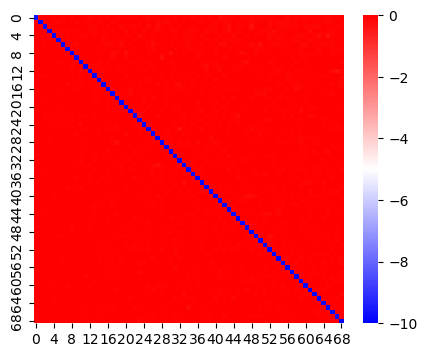

In [9]:
# plot the heat map to visualize the positions of outliers which are near -10
# they are all on the diagonal
fig, ax = plt.subplots(1, 1, figsize=(5, 4))
maxi = np.max(Nepal_alpha)
sns.heatmap(Nepal_alpha, ax = ax, vmin = - 10, vmax = 0, cmap = "bwr", cbar = True)
plt.show()